In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.graph_objects as go # 시각화 
import statsmodels.formula.api as smf

import warnings 
warnings.filterwarnings(action = 'ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.decomposition import NMF 
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from numpy.linalg import svd 
from scipy.sparse.linalg import svds
from factor_analyzer import FactorAnalyzer # 요인분석 install 

# clustering 

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth

from sklearn.mixture import GaussianMixture

from sklearn.cluster import DBSCAN

from scipy.cluster.hierarchy import linkage, dendrogram

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import Birch 
from sklearn.cluster import OPTICS
from sklearn.cluster import SpectralClustering

#KPrototypes ; 범주형, 수치형 둘 다 고려한 알고리즘 install 
from kmodes.kprototypes import KPrototypes

#KModes ; 범주형 데이터를 고려한 클러스터링 알고리즘 
from kmodes.kmodes import KModes

from matplotlib import font_manager, rc 
font_path ='C:\\Windows\\Fonts\\Hancom Gothic Regular.ttf'
font = font_manager.FontProperties(fname=font_path).get_name() 
rc('font', family = font)

# recommentation 

from surprise import Reader

# text 

from konlpy.tag import Okt
from sklearn.metrics.pairwise import cosine_similarity

from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

le = LabelEncoder() 
ms = MinMaxScaler() 
ss = StandardScaler() 
rs = RobustScaler() # 이상치에 강한

### 1. feature 추가 

* 단가 
* 접근성

In [ ]:
data = pd.read_csv('C:/Users/fsecuser507/viz_data.csv',index_col=0)
data['단가'] = data['결제금액']/data['결제수량']

In [ ]:
data['단가'] = data['결제금액']/data['결제수량']

In [ ]:
data.운영점포수.describe()

# 평균 : 921 개 
# 중앙값 : 471개 
# 75% : 910개
# 최대값 : 9831개 

count    1.363537e+07
mean     9.167029e+02
std      1.481684e+03
min      2.000000e+00
25%      1.730000e+02
50%      4.660000e+02
75%      9.060000e+02
max      9.831000e+03
Name: 운영점포수, dtype: float64

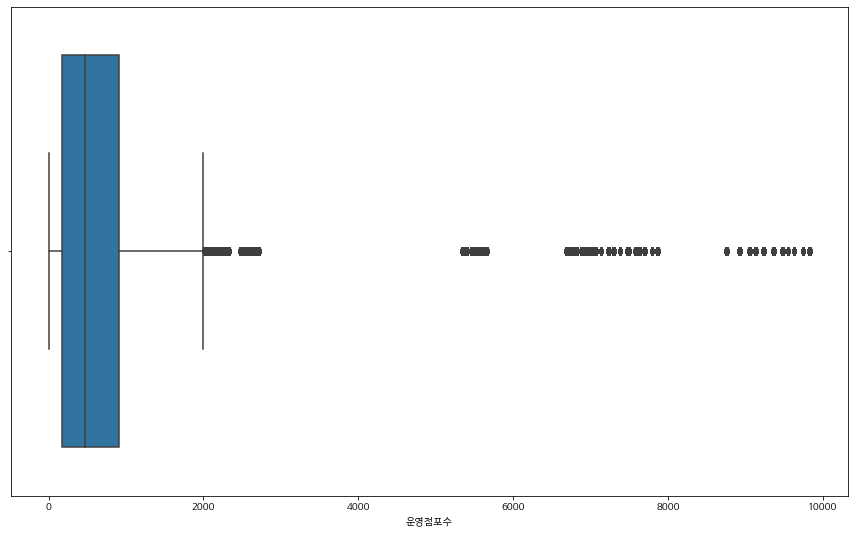

In [ ]:
plt.figure(figsize = (15,9))
sns.boxplot(data['운영점포수'])
plt.show() # 범주별로 그려지는 형태 

In [ ]:
len(data)

13635366

In [ ]:
data['접근성'] = 0

In [ ]:
data.loc[data['운영점포수'] <= 4000,'접근성'] = 1 
data.loc[(data['운영점포수'] > 4000) & (data['운영점포수'] <= 6000) ,'접근성'] = 2
data.loc[(data['운영점포수'] > 6000) & (data['운영점포수'] <= 8000) ,'접근성'] = 3
data.loc[(data['운영점포수'] > 8000) & (data['운영점포수'] <= 10000) ,'접근성'] = 4

<AxesSubplot:>

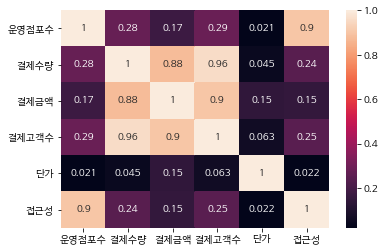

In [ ]:
sns.heatmap(data[['운영점포수', '결제수량', '결제금액', '결제고객수','단가','접근성']].corr(),annot=True)

#### 추가된 feature 데이터 : analysis_data.csv 

In [ ]:
data = pd.read_csv('C:/Users/fsecuser507/analysis_data.csv',index_col=0) 

In [ ]:
data.head()

,YM_CD,시도명,운영점포수,주변입지,AGE,SEX,상품대분류,상품중분류,결제수량,결제금액,결제고객수,month,요일,결제시간,가구생애,단가,접근성
0,202101,서울특별시,6685,가족주택,40,1,간편식사,도시락,24,126327,22,1,일,00~05,신혼영유아,5263.625000,3
1,202101,서울특별시,6685,가족주택,40,1,간편식사,주먹밥,32,44473,23,1,일,00~05,신혼영유아,1389.781250,3
2,202101,서울특별시,6685,가족주택,40,1,간편식사,김밥,11,29500,9,1,일,00~05,신혼영유아,2681.818182,3
3,202101,서울특별시,6685,가족주택,40,1,간편식사,샌드위치/햄버거,53,118102,37,1,일,00~05,신혼영유아,2228.339623,3
4,202101,서울특별시,6685,가족주택,40,1,즉석조리,튀김/베이커리/군고구마,18,28300,9,1,일,00~05,신혼영유아,1572.222222,3


### 2. 1차 필터링 - 입지, 연령대 

In [ ]:
# 주변 입지별, 연령대별 필터링 

split_df = data[['주변입지','AGE']].drop_duplicates().reset_index(drop=True)
split_df = split_df.sort_values(by=['주변입지','AGE'])

### 3. 2차 필터링 기준 세우기 - Feature importance 

* 결제자 수 예측 랜덤포레스트 모델 
* 예측에 영향을 미치는 변수를 중요도별로 시각화 

#### 3-1. 단가 포함 

* 단가는 필요시 사용자에게 입력 받는 것으로

In [ ]:
num_cols = ['결제수량', '결제금액', '결제고객수','단가']
cat_cols = ['상품중분류', 'month', '요일', '결제시간', '가구생애','접근성']

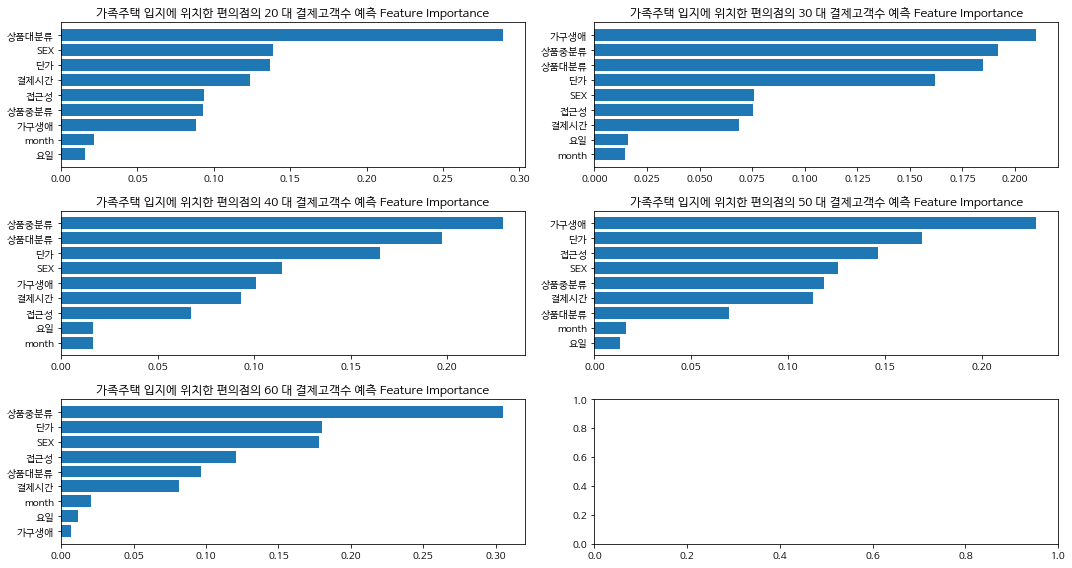

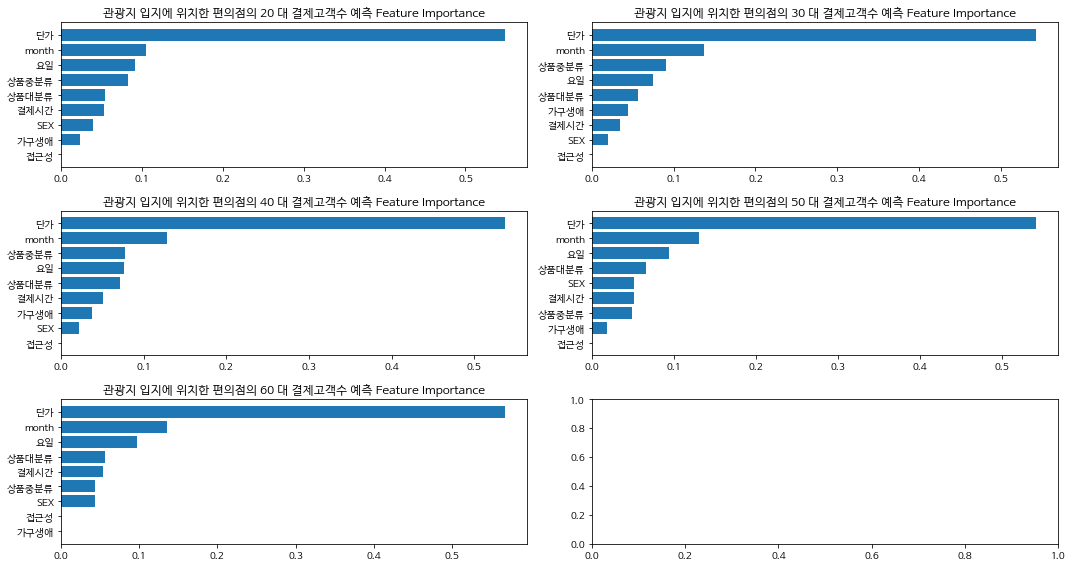

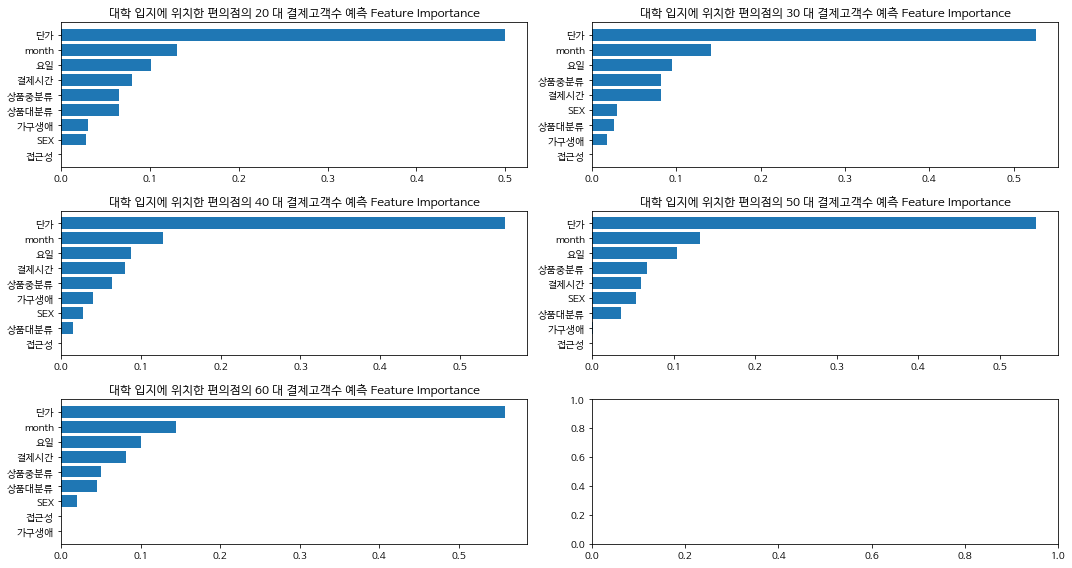

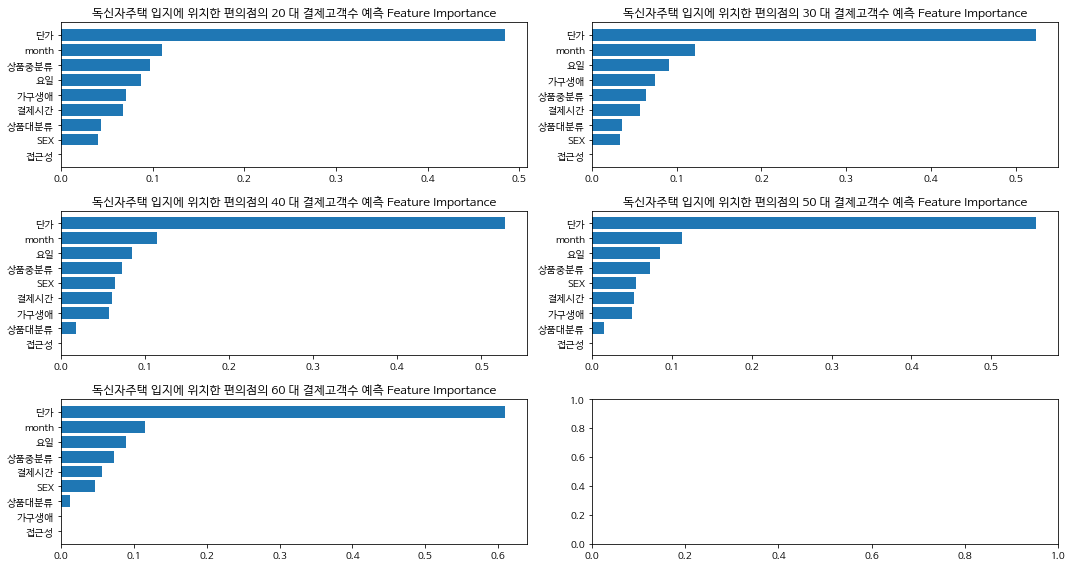

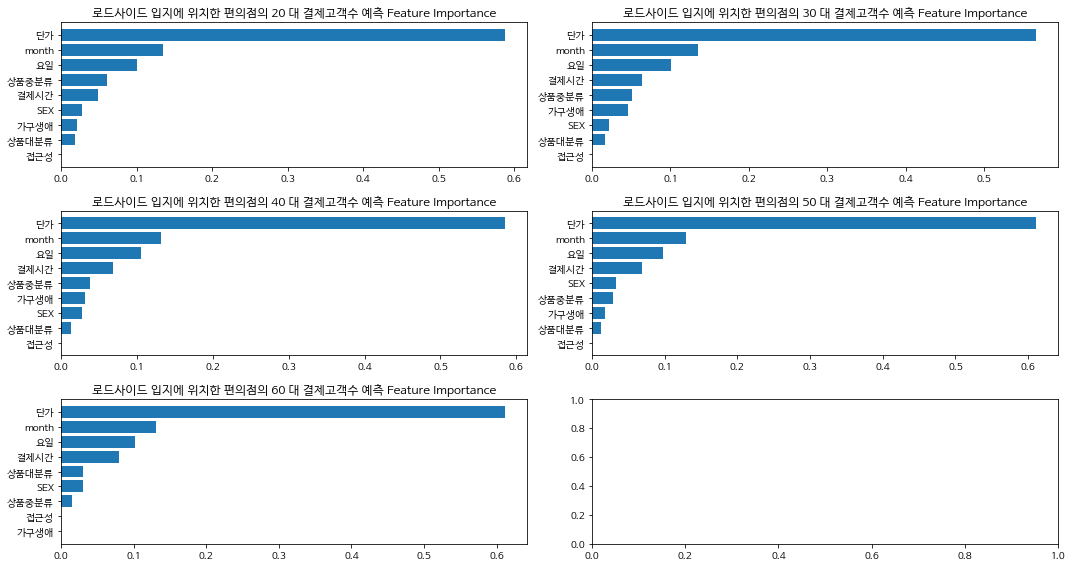

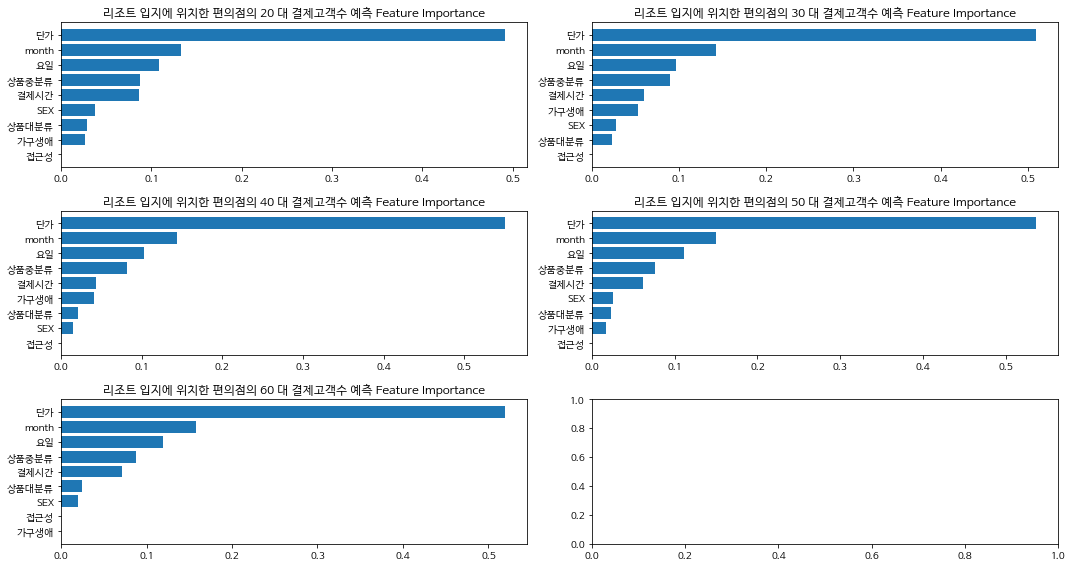

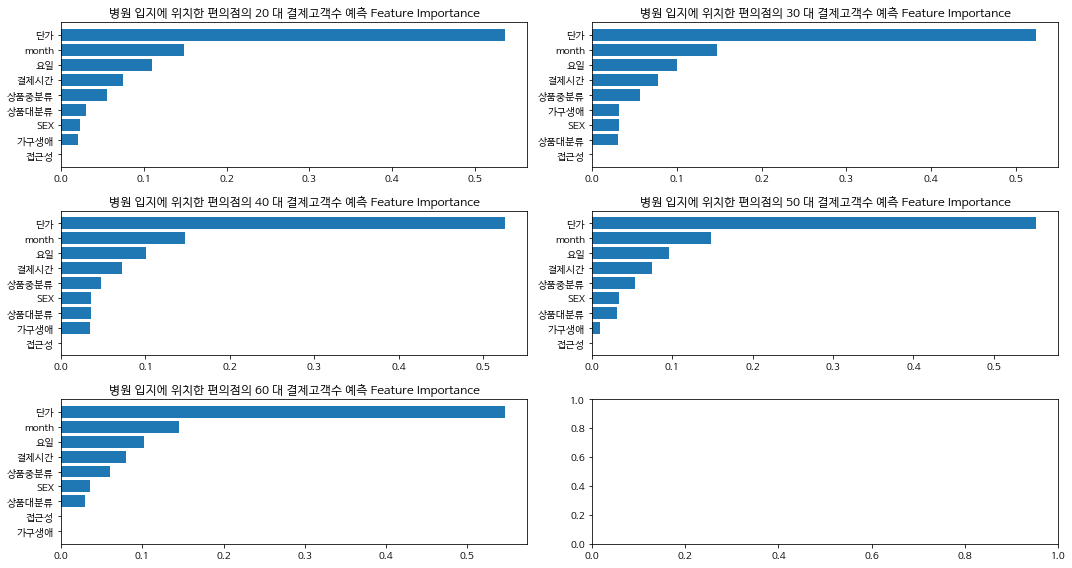

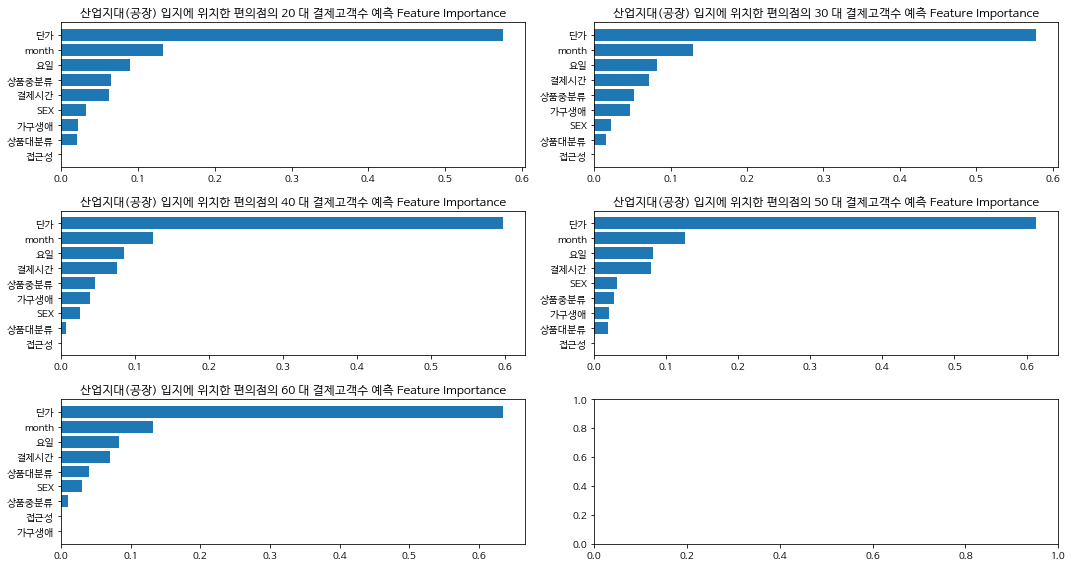

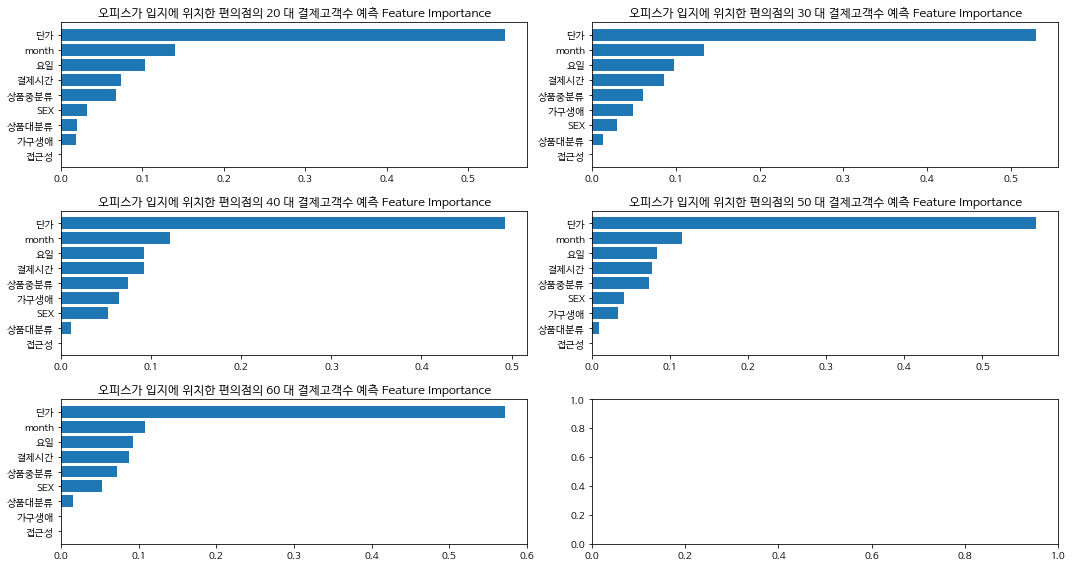

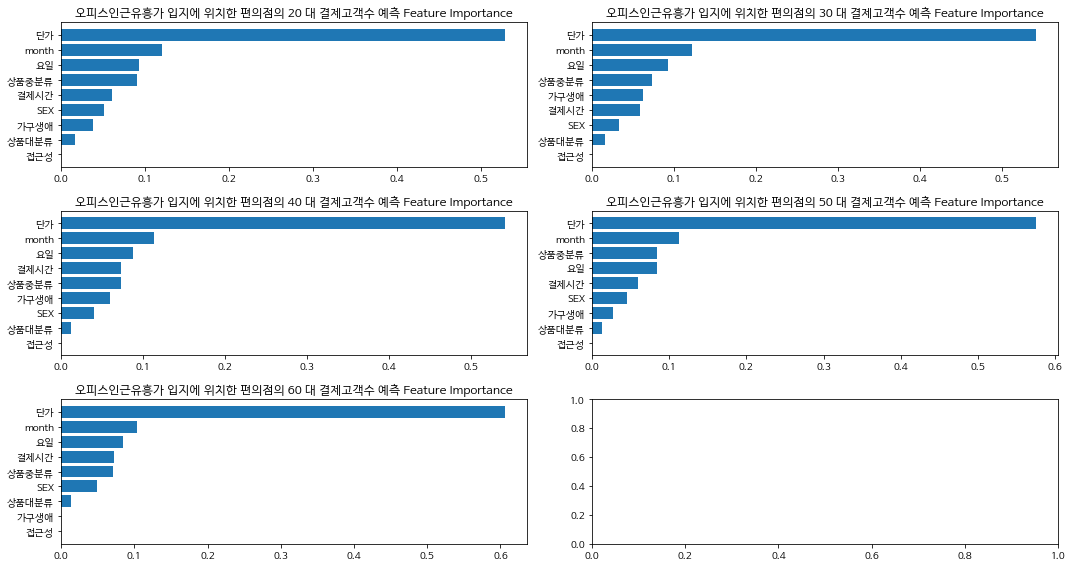

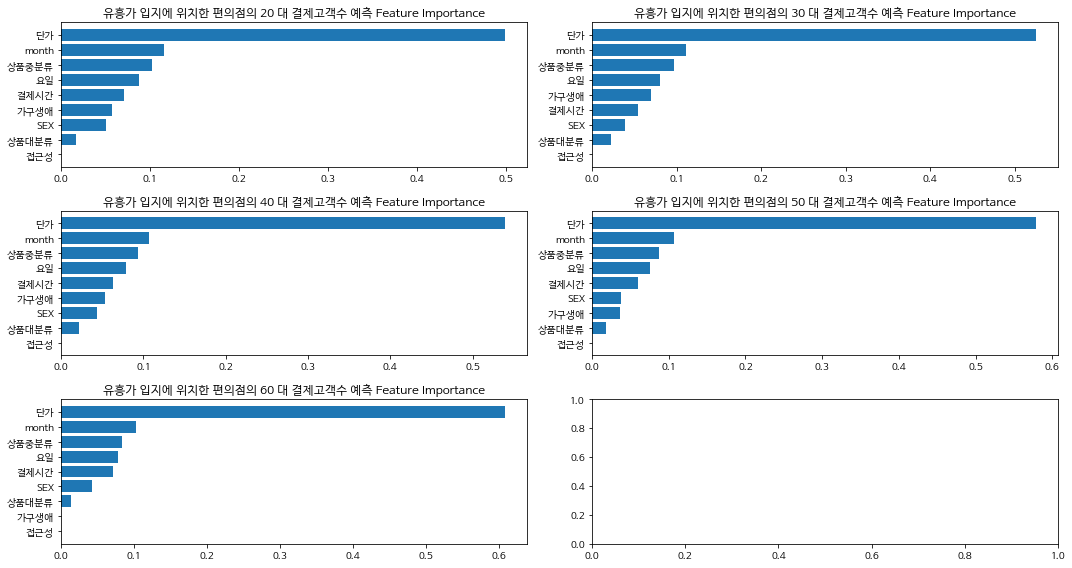

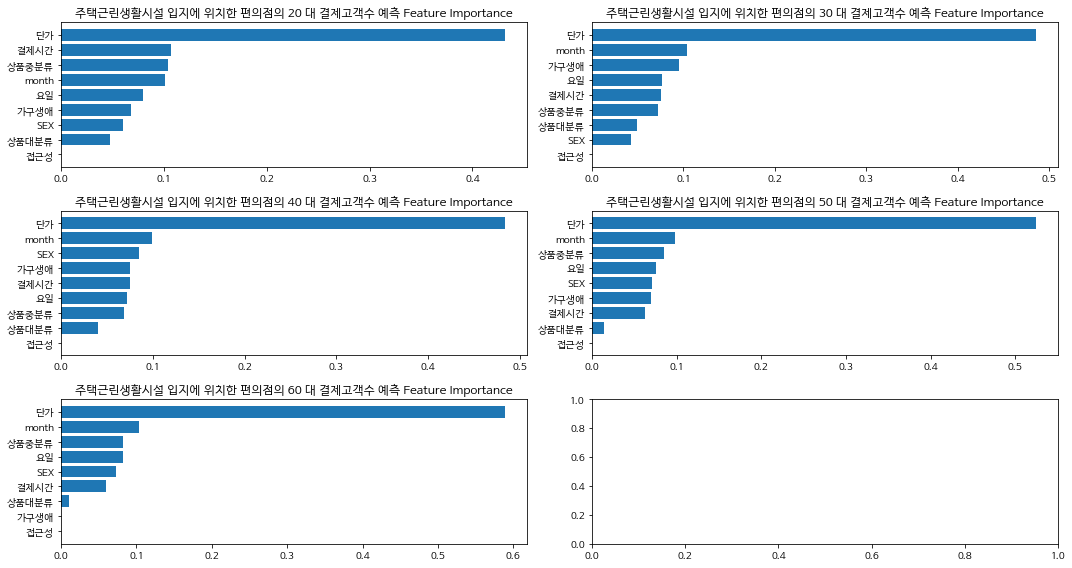

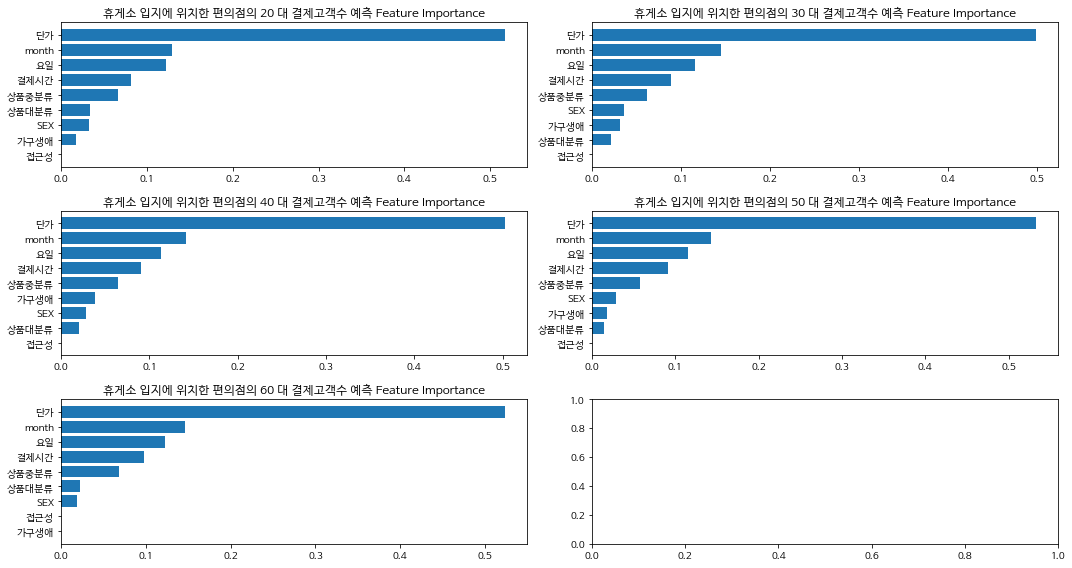

In [ ]:
for k in list(split_df.주변입지.unique()) :
    
        fig,ax = plt.subplots(nrows=3, ncols=2, figsize = (15,8))

        for j , p in  zip( [20,30,40,50,60] ,[1,2,3,4,5,6]) : 

                small = data[(data['주변입지'] == k) & (data['AGE'] == j)].drop(['YM_CD', '시도명', '운영점포수', '주변입지', 'AGE','상품대분류'], axis=1)

                df = small.copy()
                
                df[num_cols] = rs.fit_transform(df[num_cols]) # 수치형 변환 

                for i in cat_cols : 

                    df[i] = le.fit_transform(df[i]) # 범주형 변환 

                X = df.drop(['결제고객수','결제금액','결제수량'],axis=1)
                y = df['결제고객수']

                x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=12)

                rf = RandomForestRegressor()

                rf.fit(x_train, y_train)



                plt.subplot(3,2,p)

                sorted_idx = rf.feature_importances_.argsort()[:15]
                plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
                plt.title(f'{k} 입지에 위치한 편의점의 {j} 대 결제고객수 예측 Feature Importance') 
                plt.tight_layout()


        plt.show()


#### 3-2. 단가 제외 



**a.접근성**

In [ ]:
num_cols = ['결제수량', '결제금액', '결제고객수']
cat_cols = ['month', '요일', '결제시간', '가구생애','접근성']

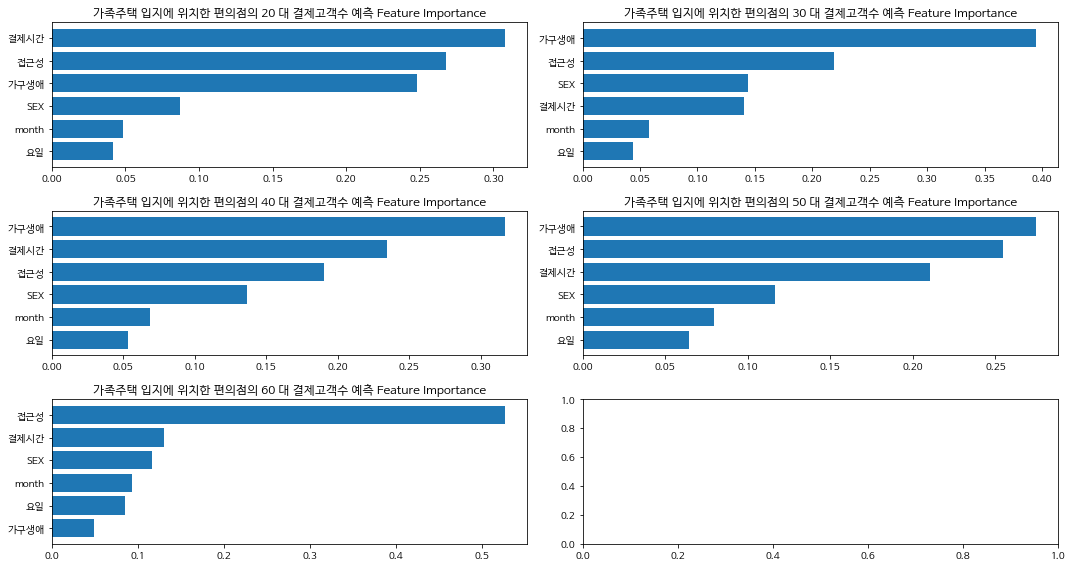

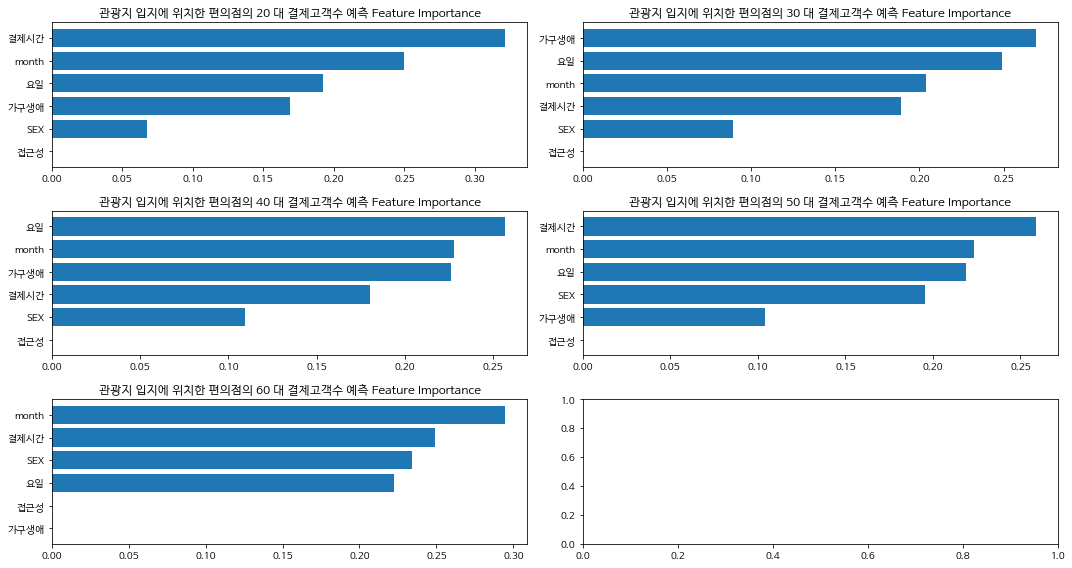

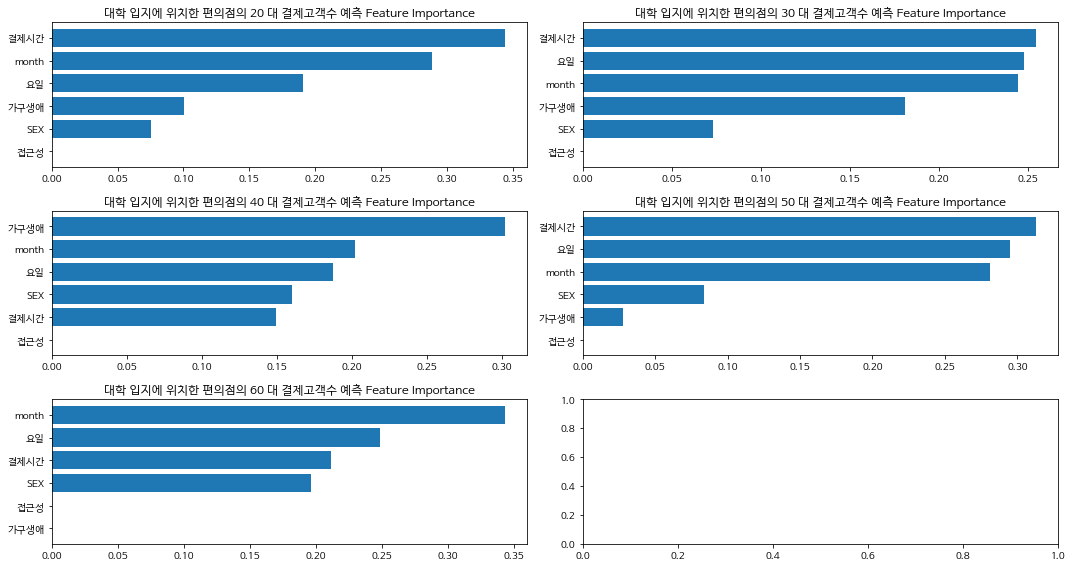

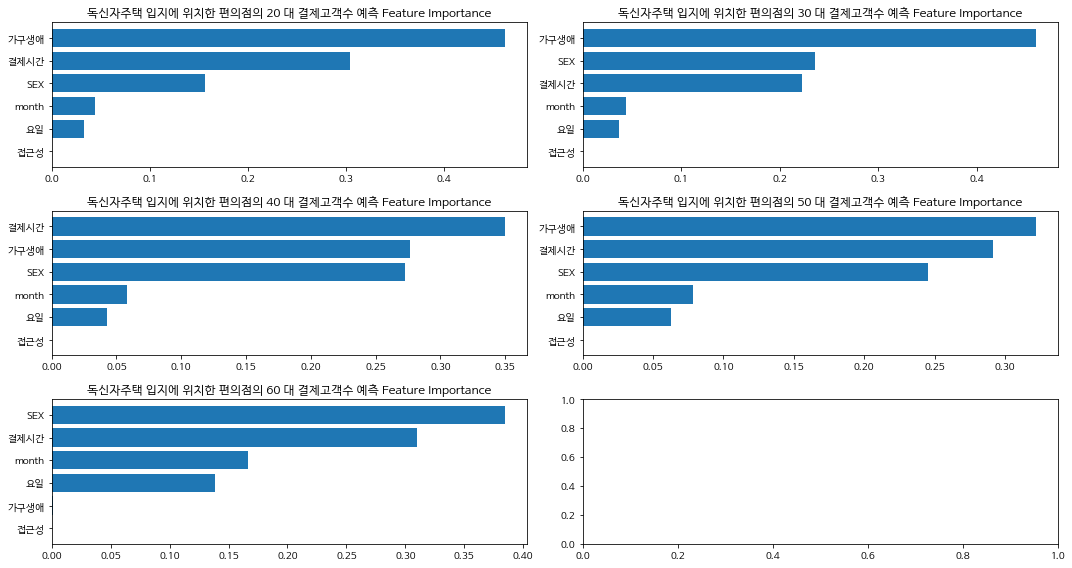

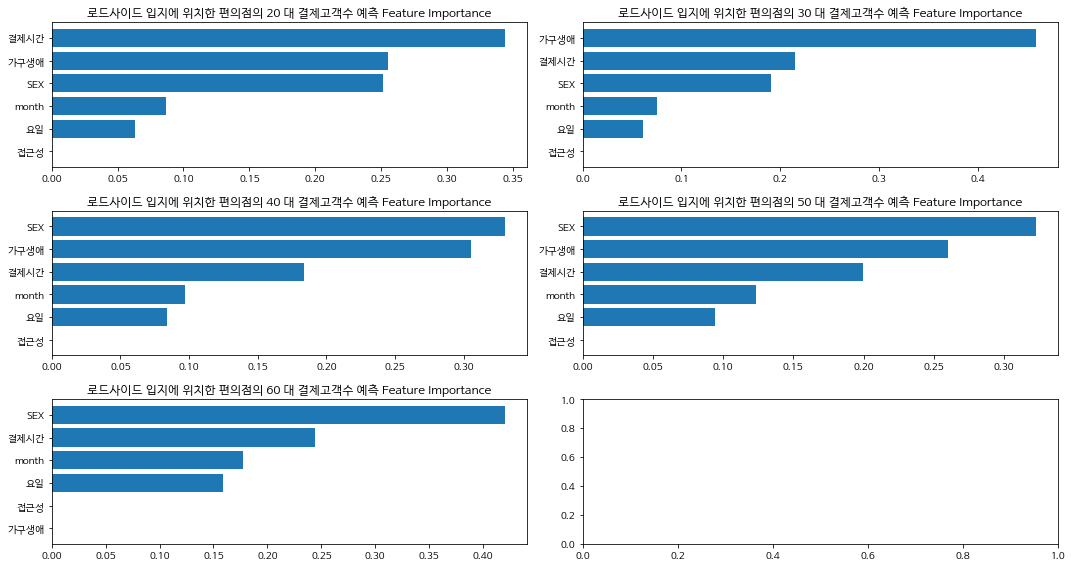

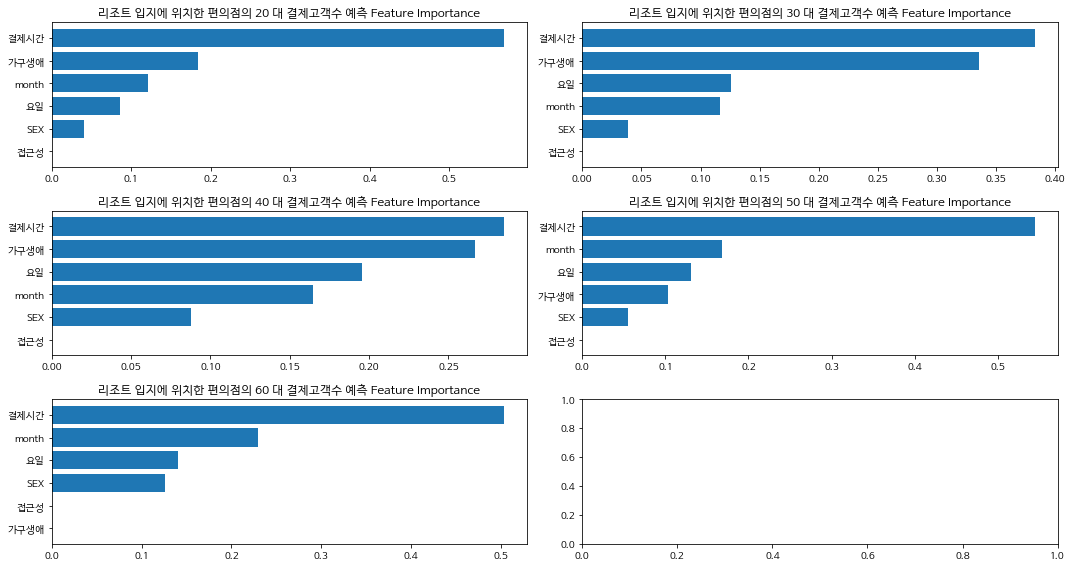

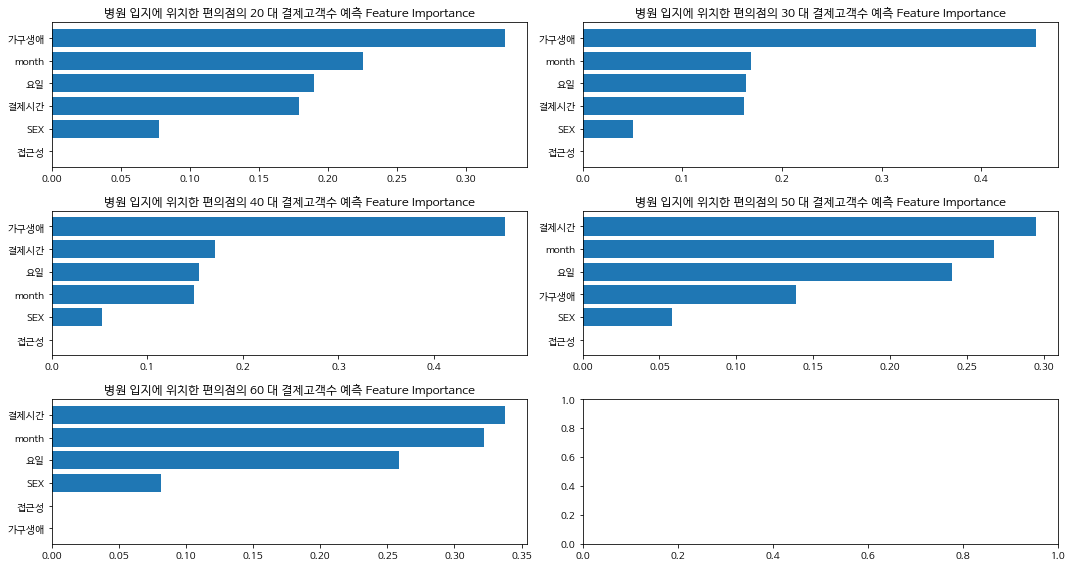

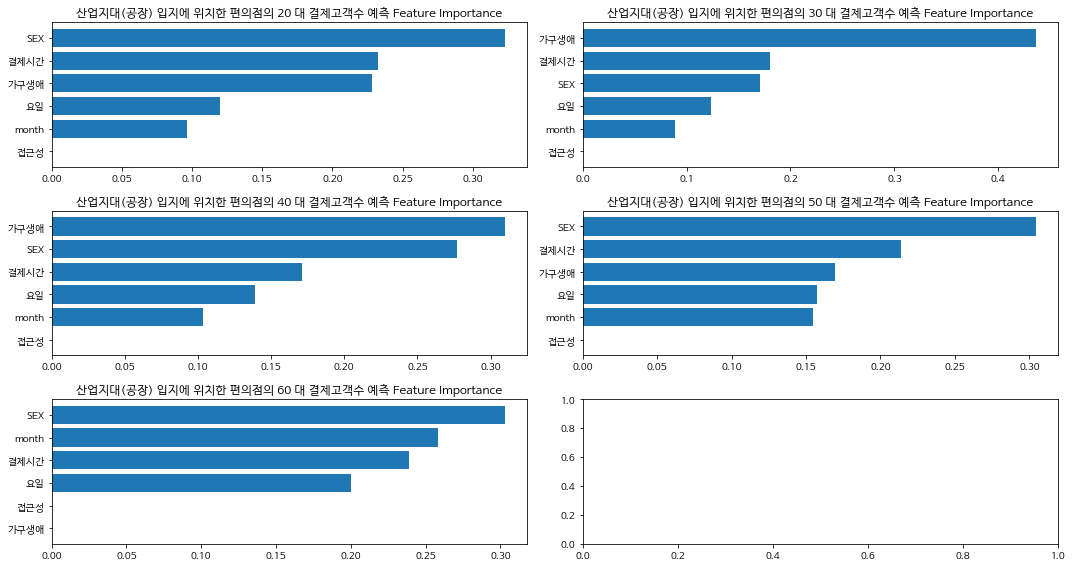

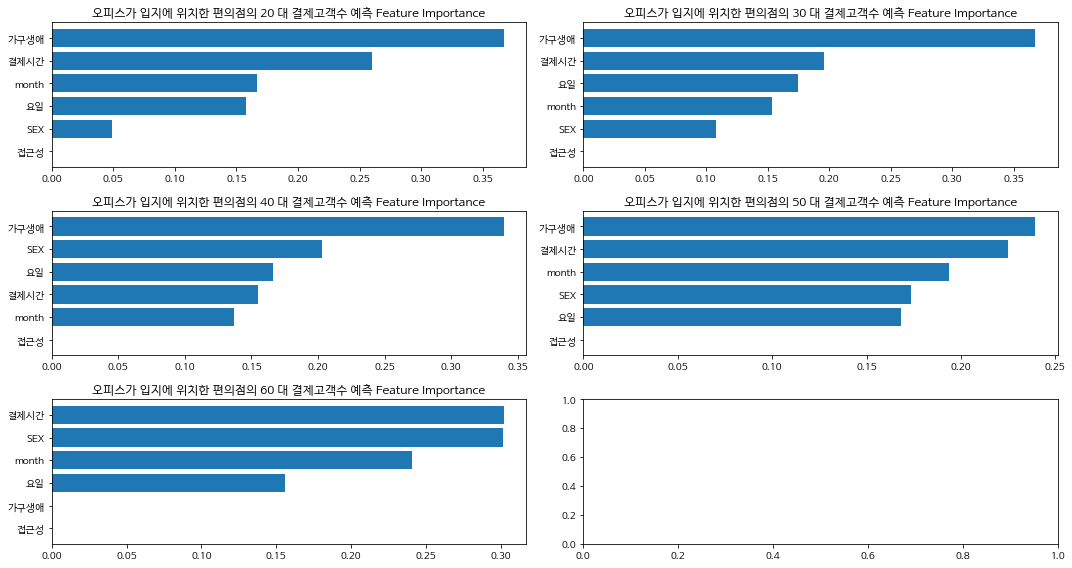

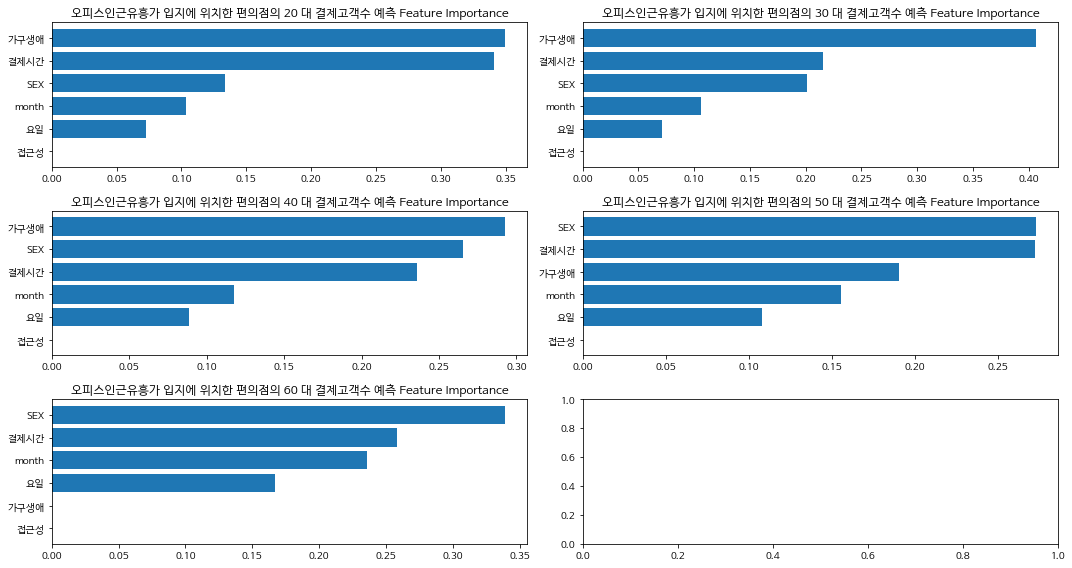

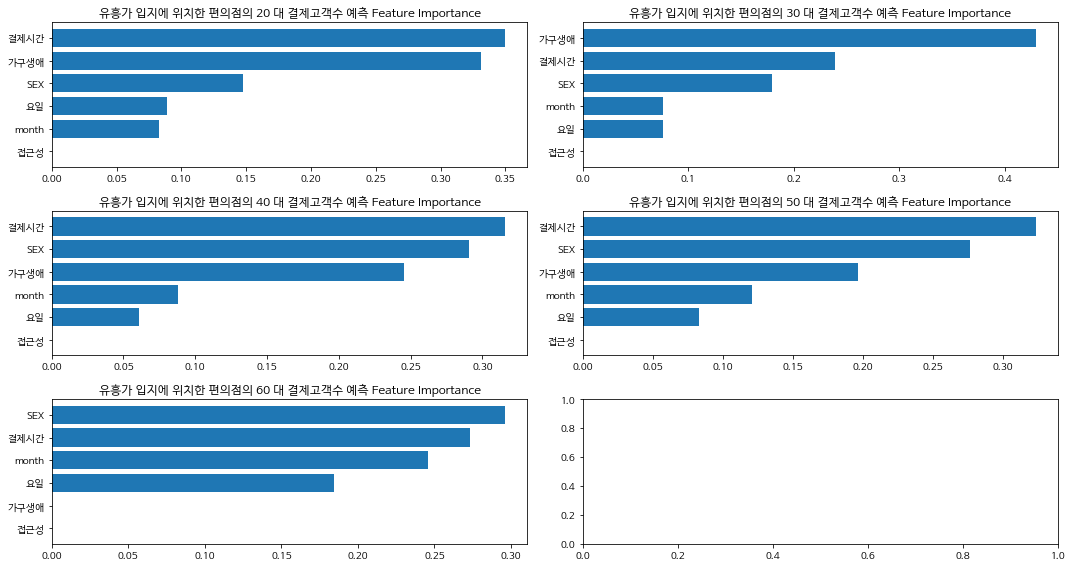

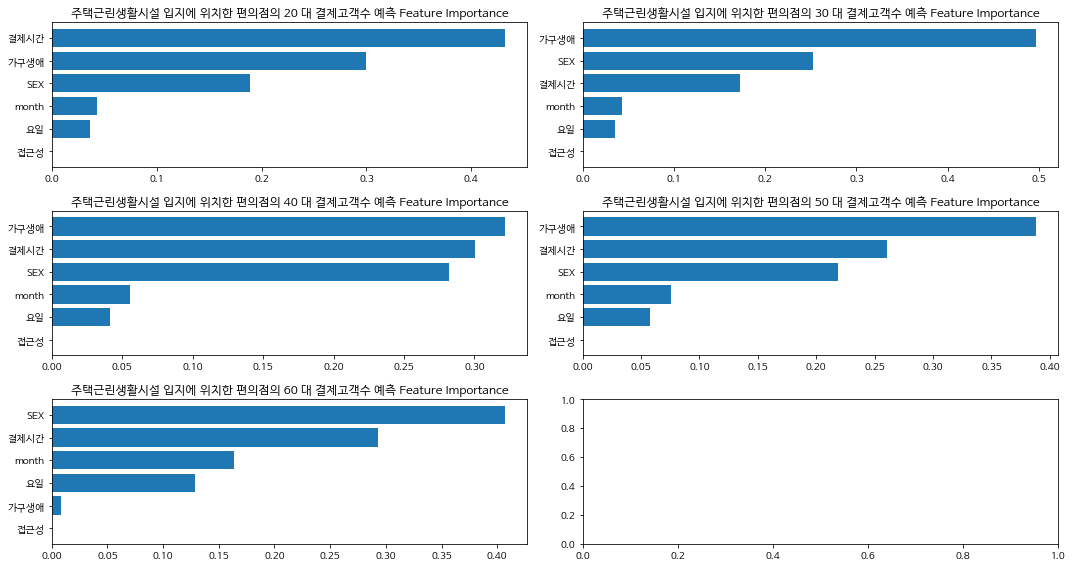

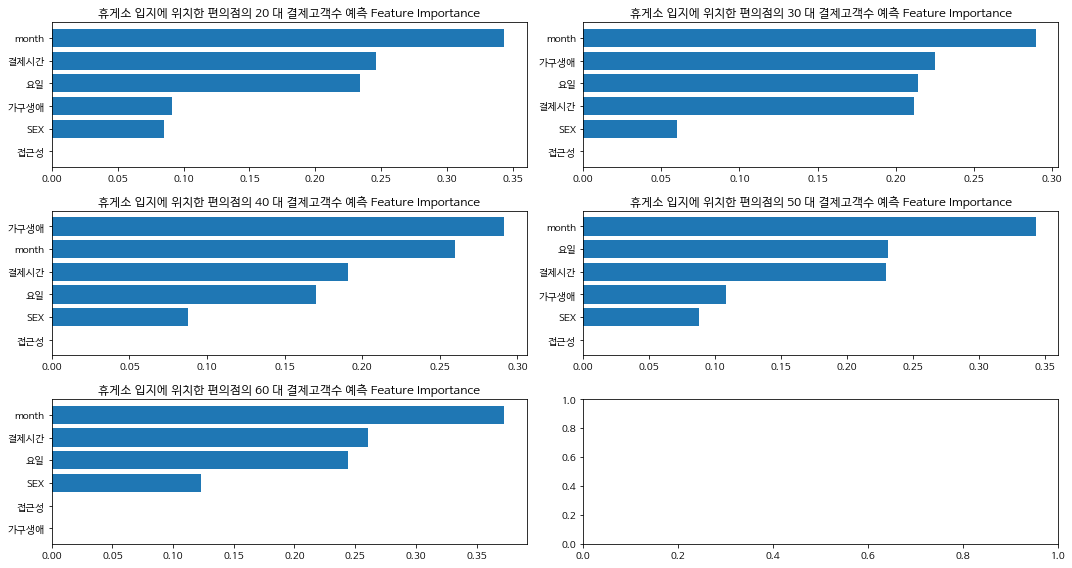

In [ ]:
for k in list(split_df.주변입지.unique()) :
    
        fig,ax = plt.subplots(nrows=3, ncols=2, figsize = (15,8))

        for j , p in  zip( [20,30,40,50,60] ,[1,2,3,4,5,6]) : 

                small = data[(data['주변입지'] == k) & (data['AGE'] == j)].drop(['YM_CD', '시도명', '운영점포수', '주변입지', 'AGE','상품중분류','단가','상품대분류'], axis=1)

                df = small.copy()
                
                df[num_cols] = rs.fit_transform(df[num_cols]) # 수치형 변환 

                for i in cat_cols : 

                    df[i] = le.fit_transform(df[i]) # 범주형 변환 

                X = df.drop(['결제고객수','결제금액','결제수량'],axis=1)
                y = df['결제고객수']

                x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=12)

                rf = RandomForestRegressor()

                rf.fit(x_train, y_train)



                plt.subplot(3,2,p)

                sorted_idx = rf.feature_importances_.argsort()[:15]
                plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
                plt.title(f'{k} 입지에 위치한 편의점의 {j} 대 결제고객수 예측 Feature Importance') 
                plt.tight_layout()


        plt.show()

**b. 운영점포수**

In [ ]:
num_cols = ['결제수량', '결제금액', '결제고객수','운영점포수']
cat_cols = ['month', '요일', '결제시간', '가구생애']

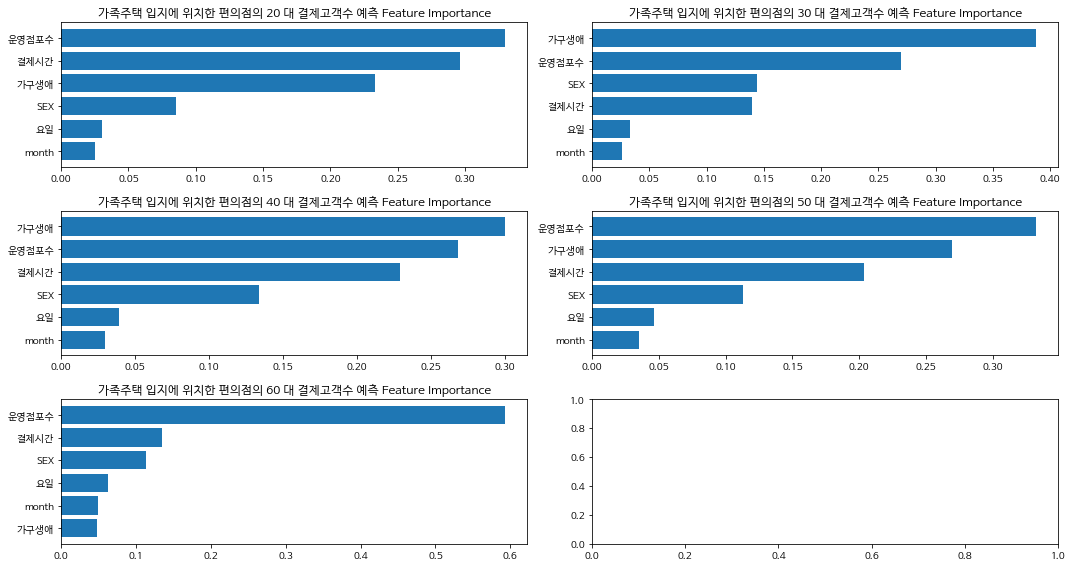

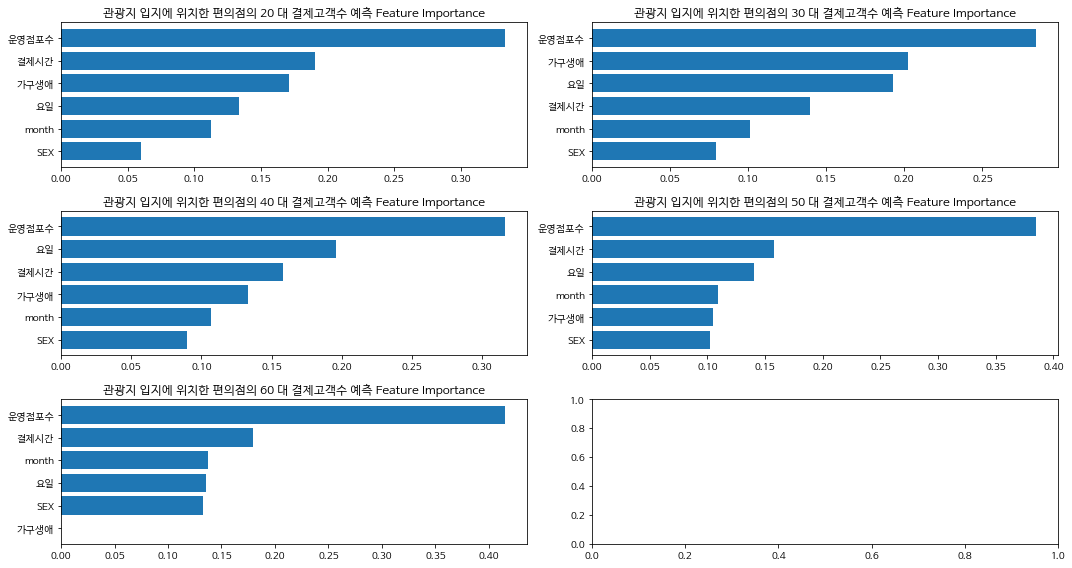

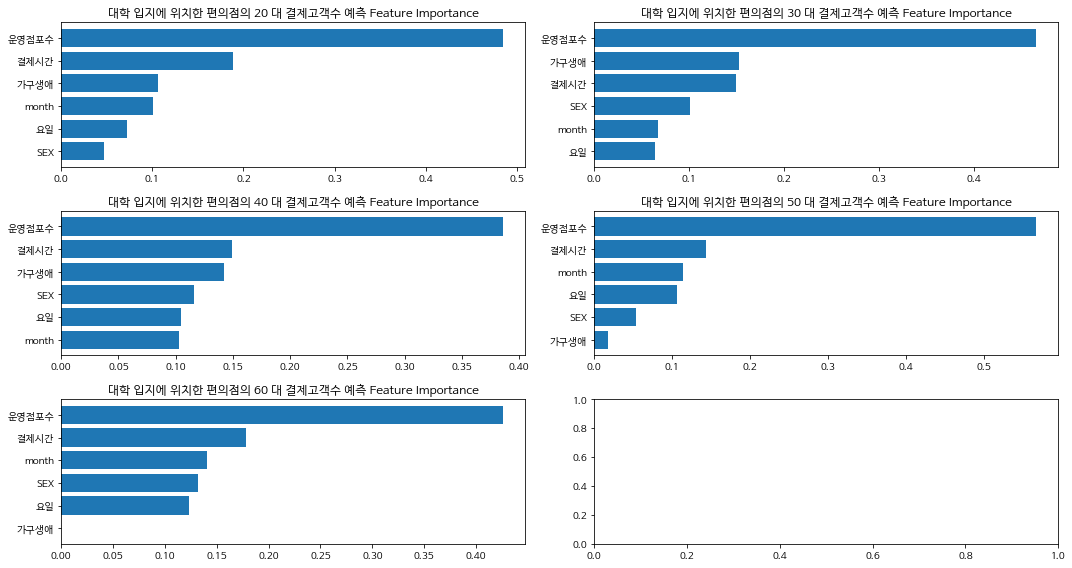

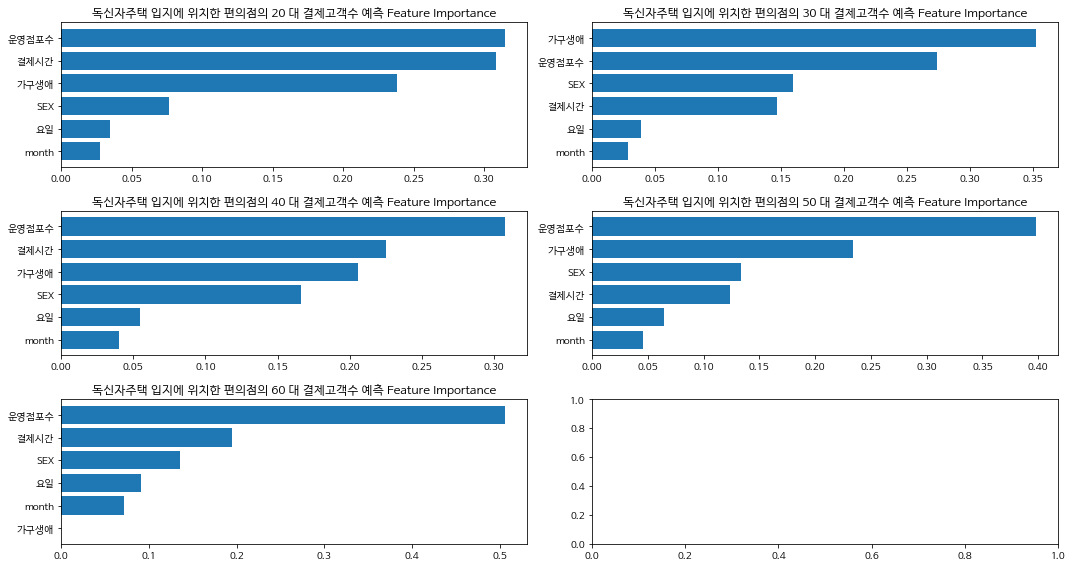

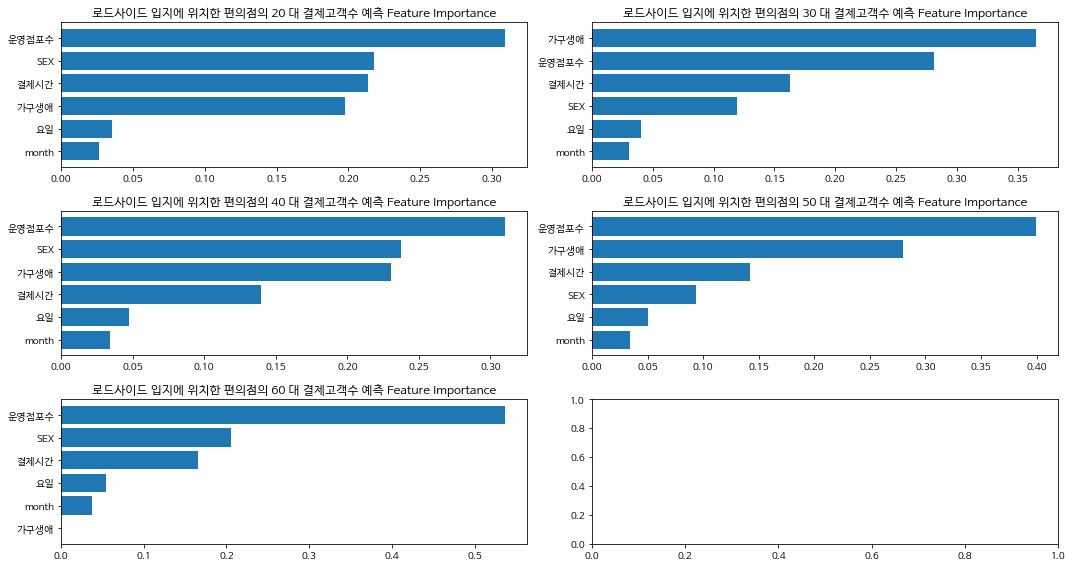

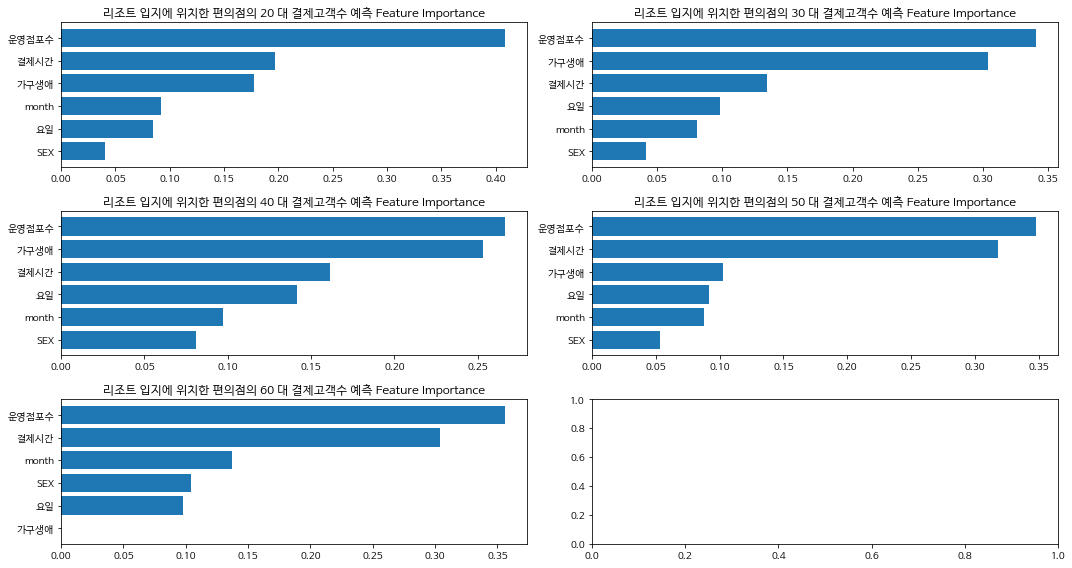

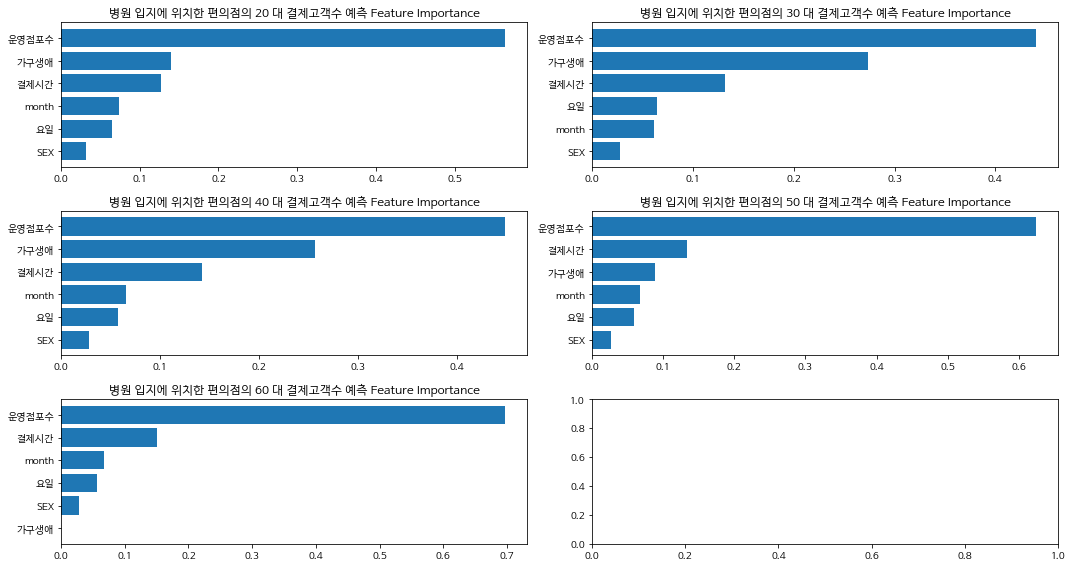

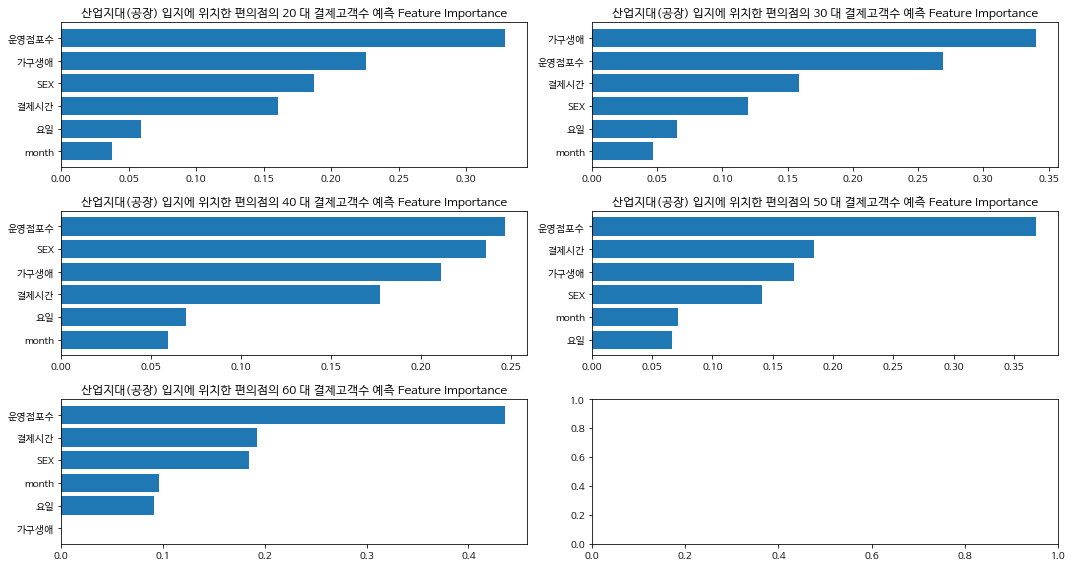

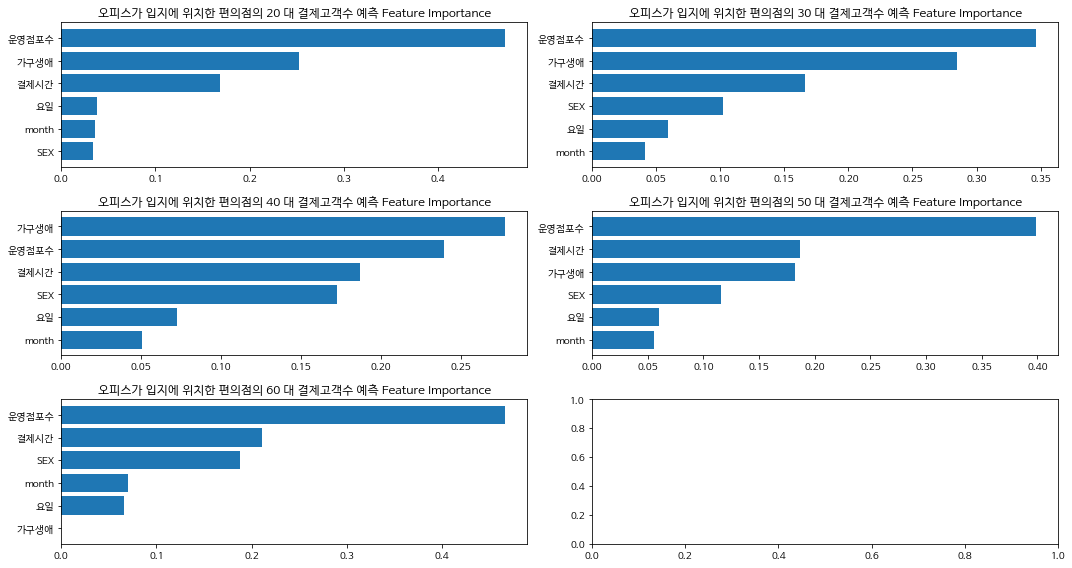

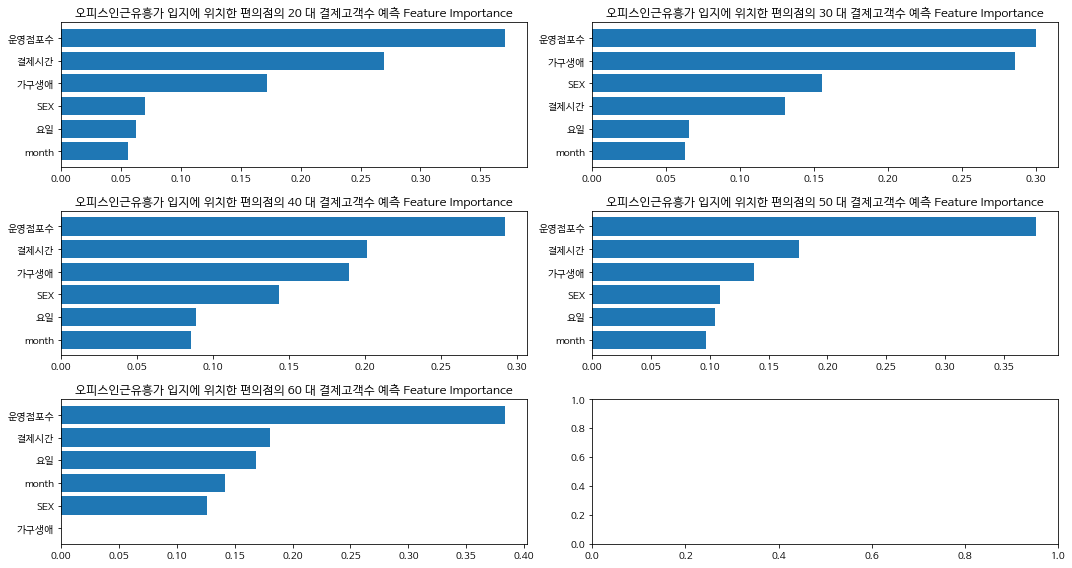

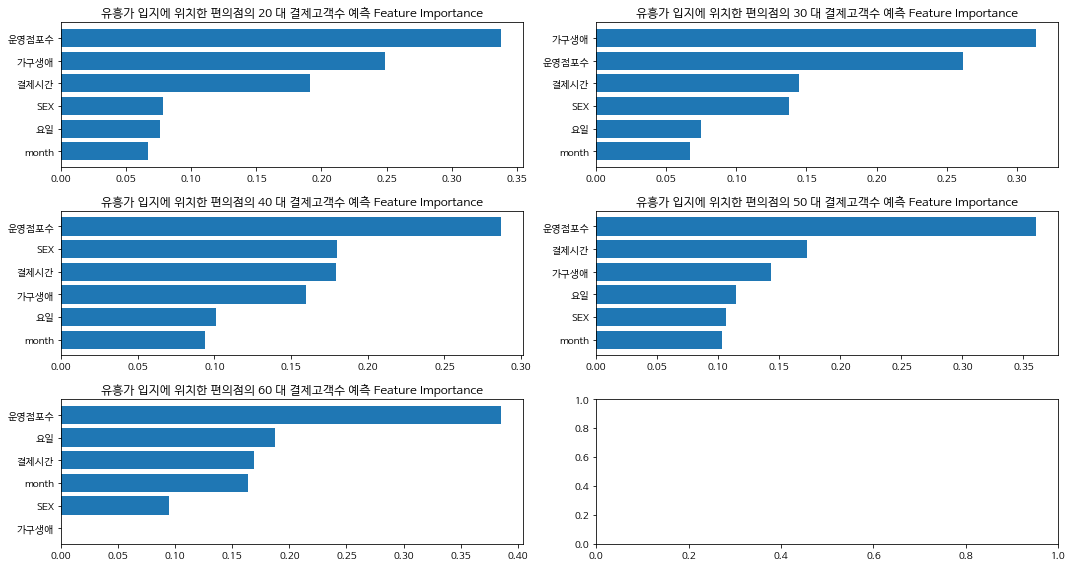

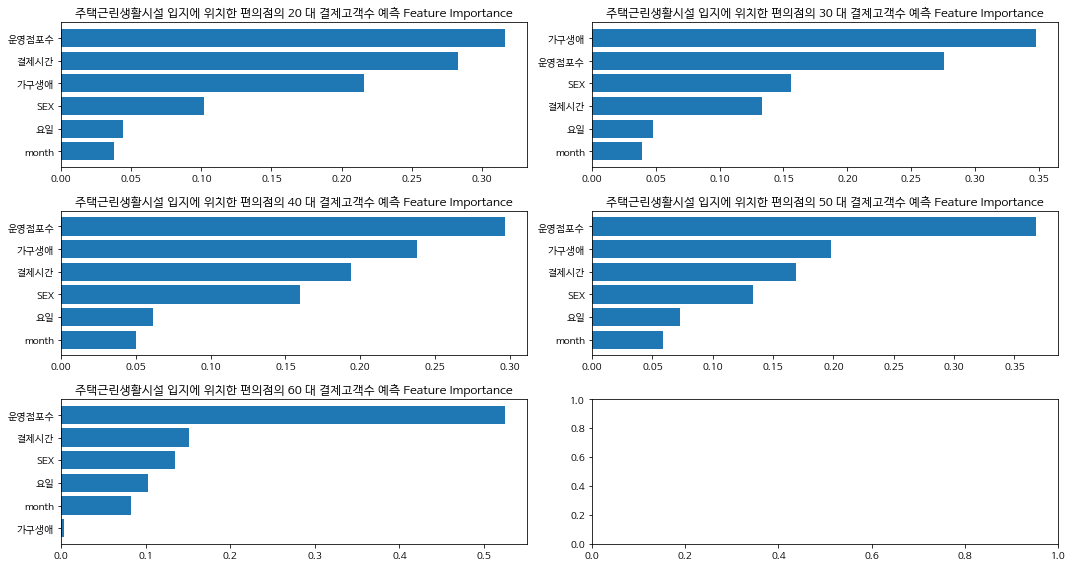

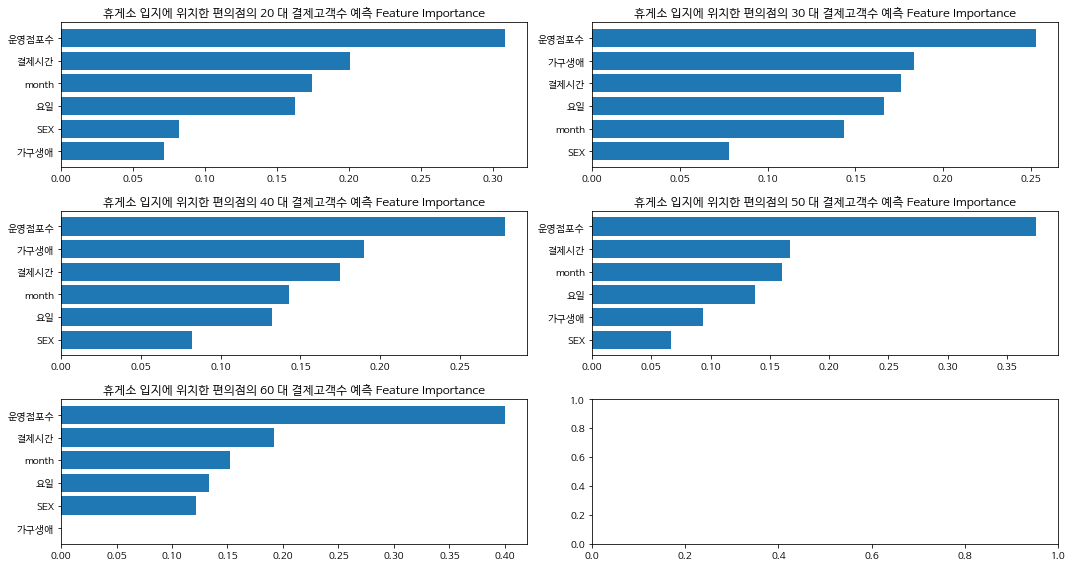

In [ ]:
for k in list(split_df.주변입지.unique()) :
    
        fig,ax = plt.subplots(nrows=3, ncols=2, figsize = (15,8))

        for j , p in  zip( [20,30,40,50,60] ,[1,2,3,4,5,6]) : 

                small = data[(data['주변입지'] == k) & (data['AGE'] == j)].drop(['YM_CD', '시도명', '접근성', '주변입지', 'AGE','상품중분류','단가','상품대분류'], axis=1)

                df = small.copy()
                
                df[num_cols] = rs.fit_transform(df[num_cols]) # 수치형 변환 

                for i in cat_cols : 

                    df[i] = le.fit_transform(df[i]) # 범주형 변환 

                X = df.drop(['결제고객수','결제금액','결제수량'],axis=1)
                y = df['결제고객수']

                x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=12)

                rf = RandomForestRegressor()

                rf.fit(x_train, y_train)



                plt.subplot(3,2,p)

                sorted_idx = rf.feature_importances_.argsort()[:15]
                plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
                plt.title(f'{k} 입지에 위치한 편의점의 {j} 대 결제고객수 예측 Feature Importance') 
                plt.tight_layout()


        plt.show()

#### 3-3. 수치형 변수 스케일링 :  RobustScaler 

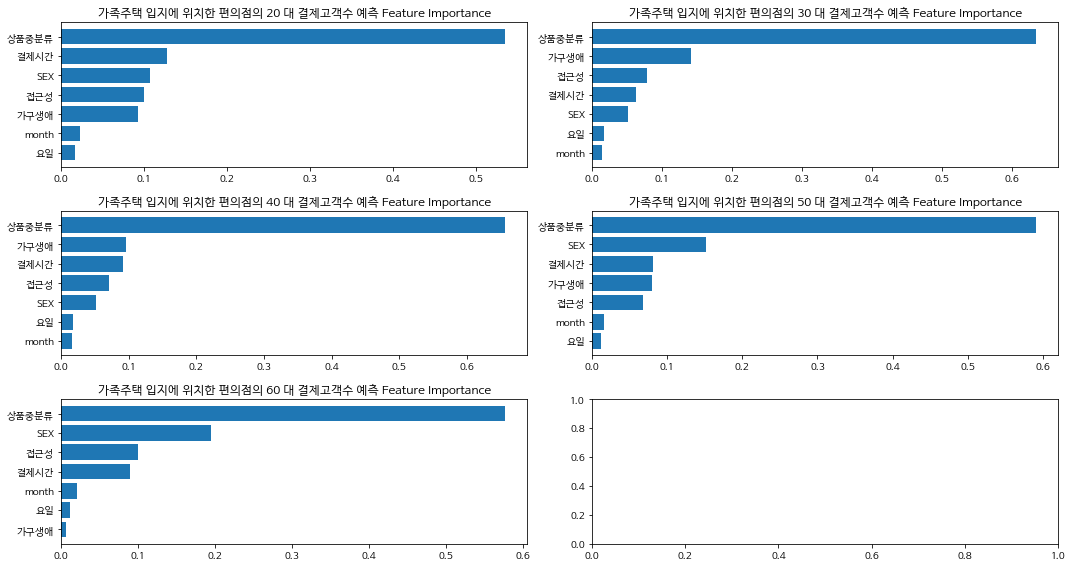

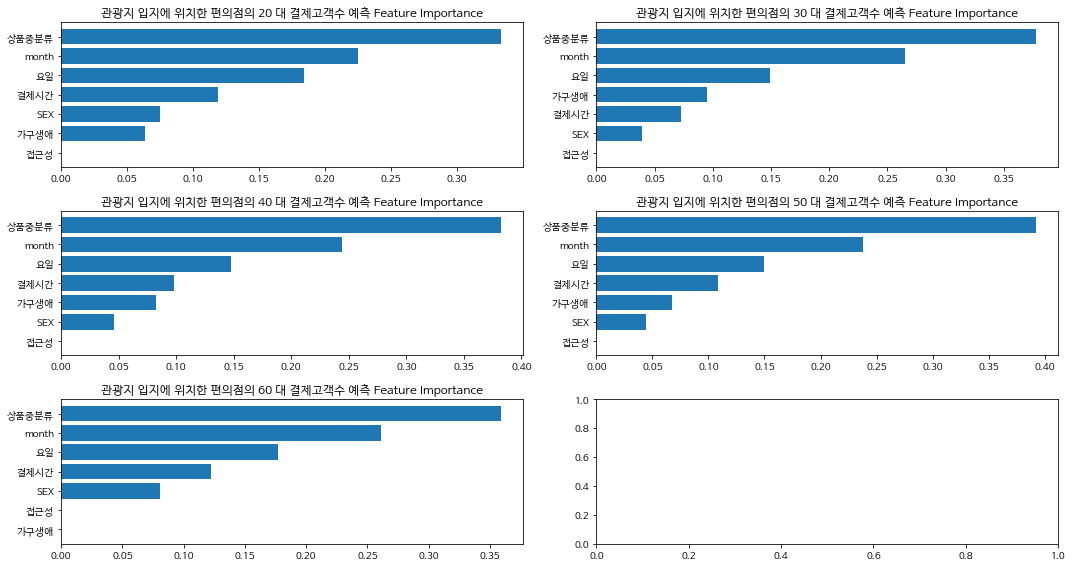

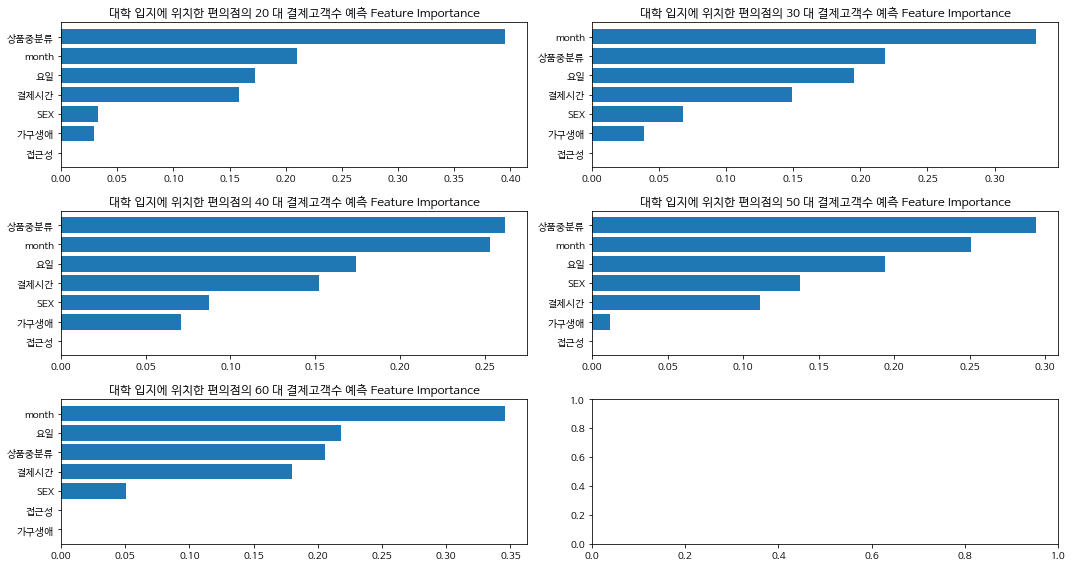

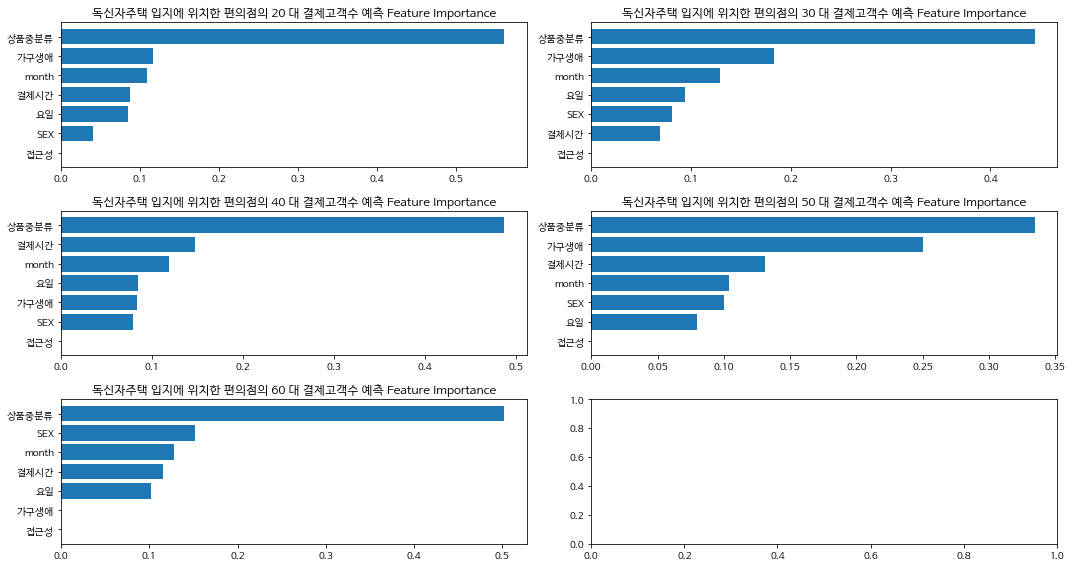

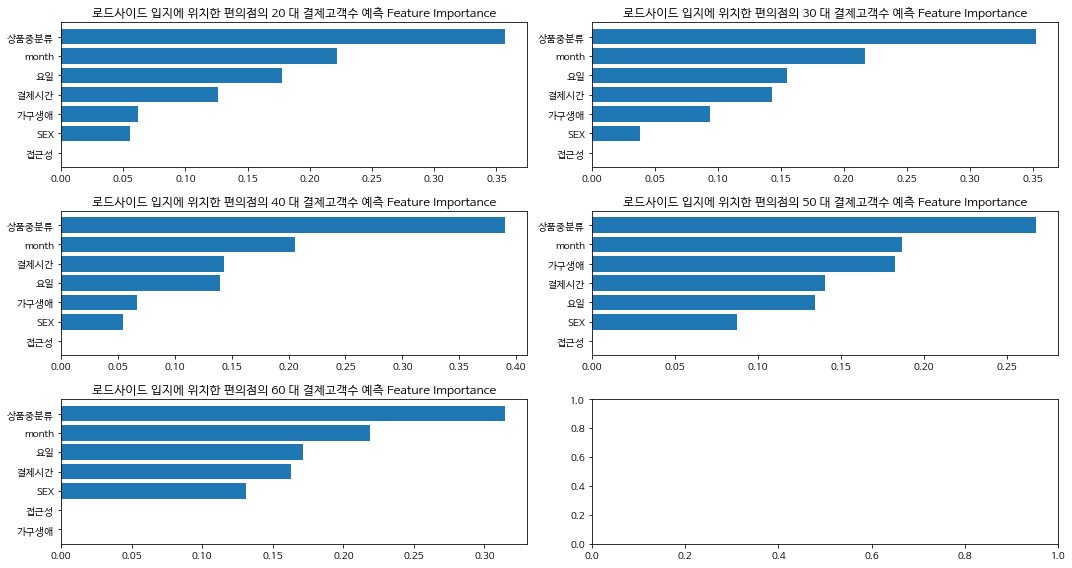

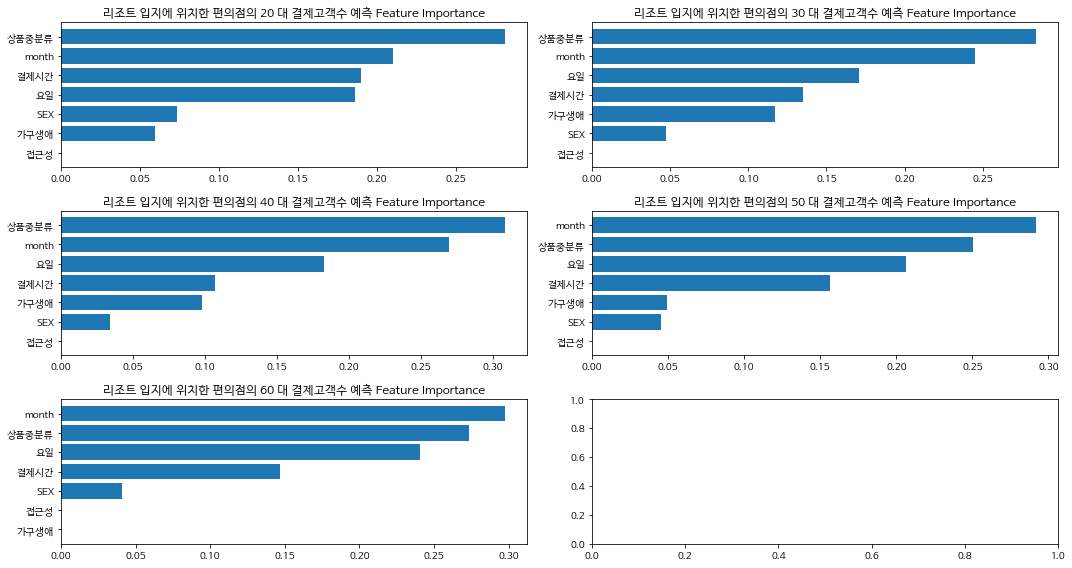

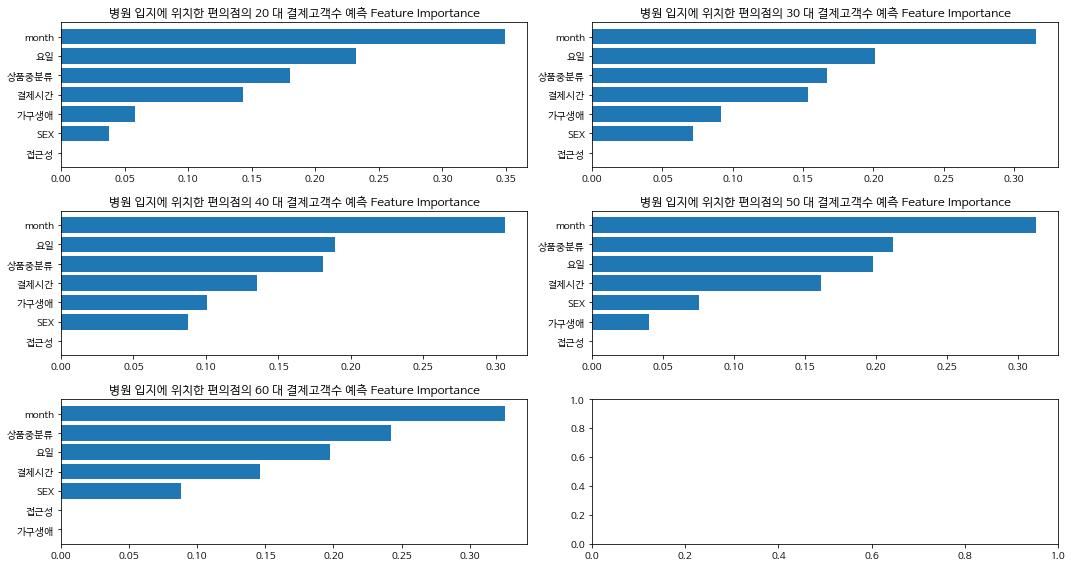

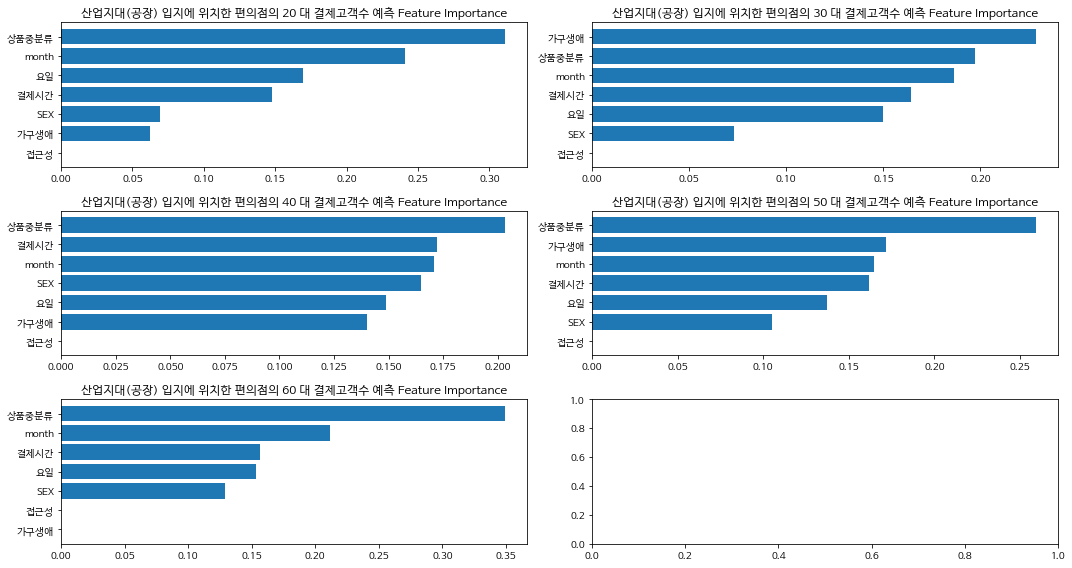

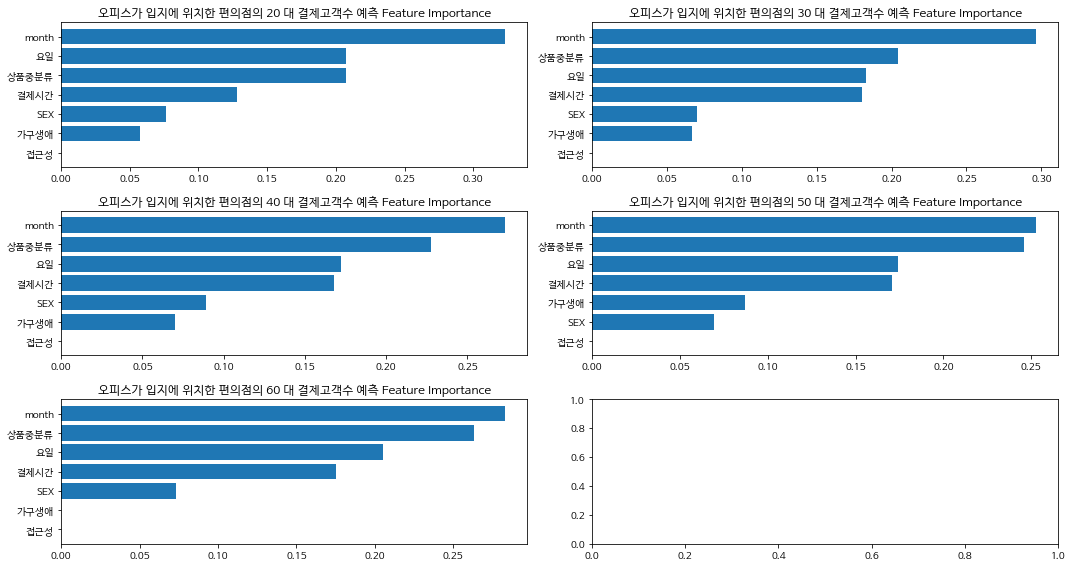

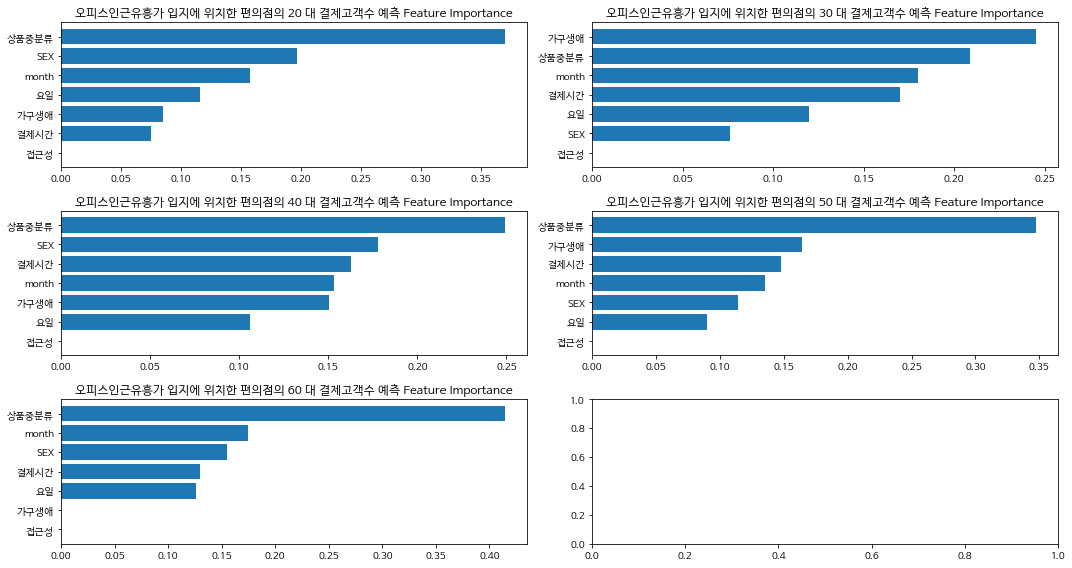

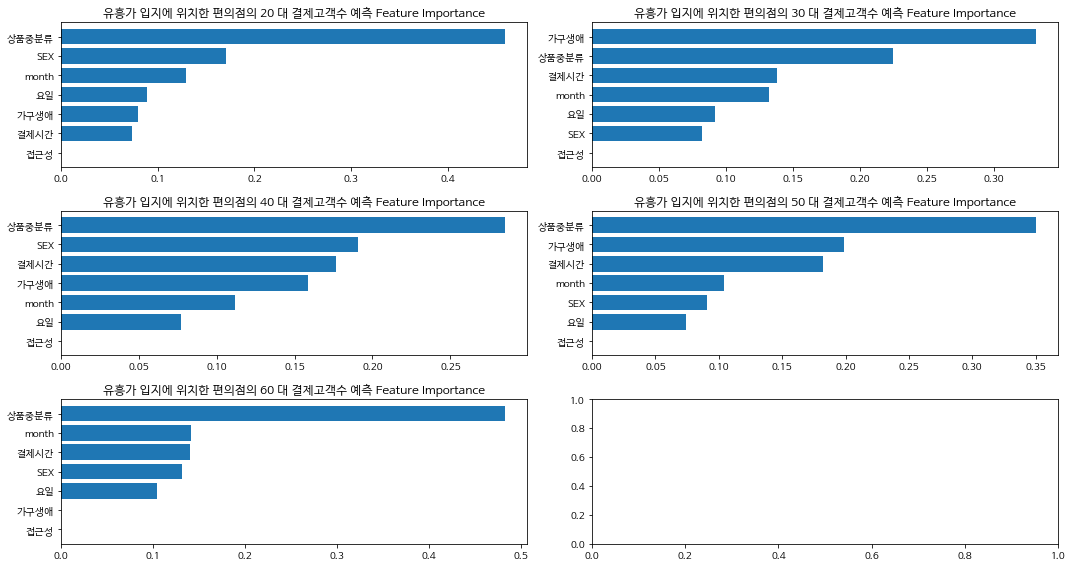

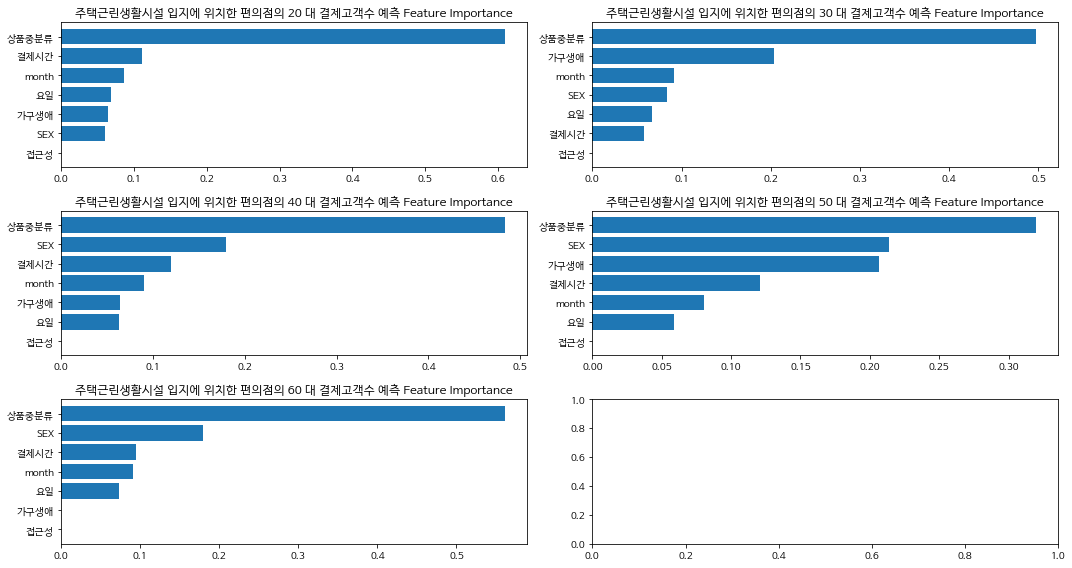

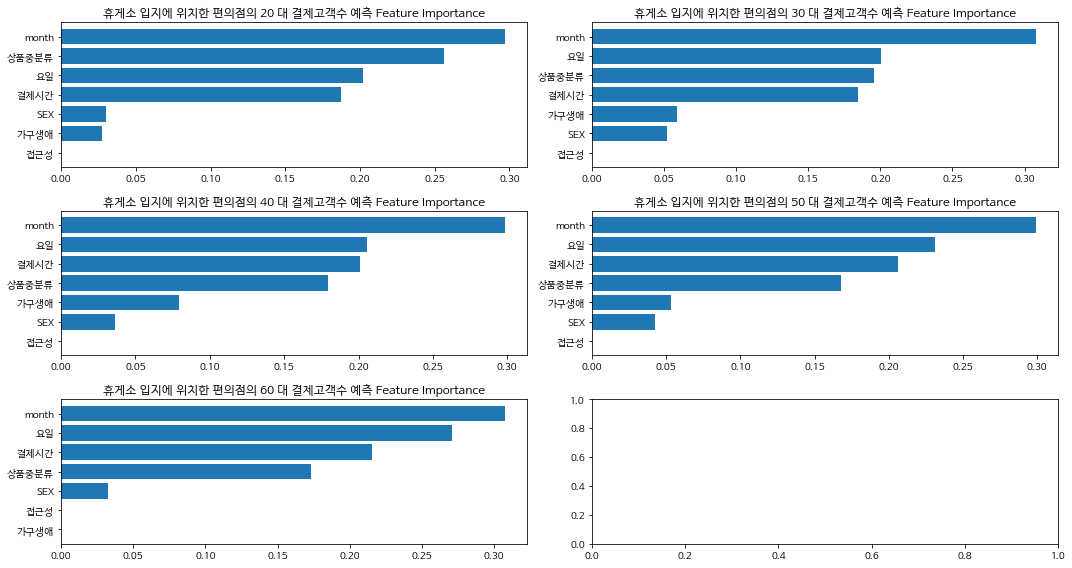

In [ ]:
for k in list(split_df.주변입지.unique()) :
    
        fig,ax = plt.subplots(nrows=3, ncols=2, figsize = (15,8))

        for j , p in  zip( [20,30,40,50,60] ,[1,2,3,4,5,6]) : 

                small = data[(data['주변입지'] == k) & (data['AGE'] == j)].drop(['YM_CD', '시도명', '운영점포수', '주변입지', 'AGE','상품대분류','단가'], axis=1)

                df = small.copy()
                
                df[num_cols] = rs.fit_transform(df[num_cols]) # 수치형 변환 

                for i in cat_cols : 

                    df[i] = le.fit_transform(df[i]) # 범주형 변환 

                X = df.drop(['결제고객수','결제금액','결제수량'],axis=1)
                y = df['결제고객수']

                x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=12)

                rf = RandomForestRegressor()

                rf.fit(x_train, y_train)



                plt.subplot(3,2,p)

                sorted_idx = rf.feature_importances_.argsort()[:15]
                plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
                plt.title(f'{k} 입지에 위치한 편의점의 {j} 대 결제고객수 예측 Feature Importance') 
                plt.tight_layout()


        plt.show()

#### 3-4. 수치형 변수 스케일링 :  StandardScaler

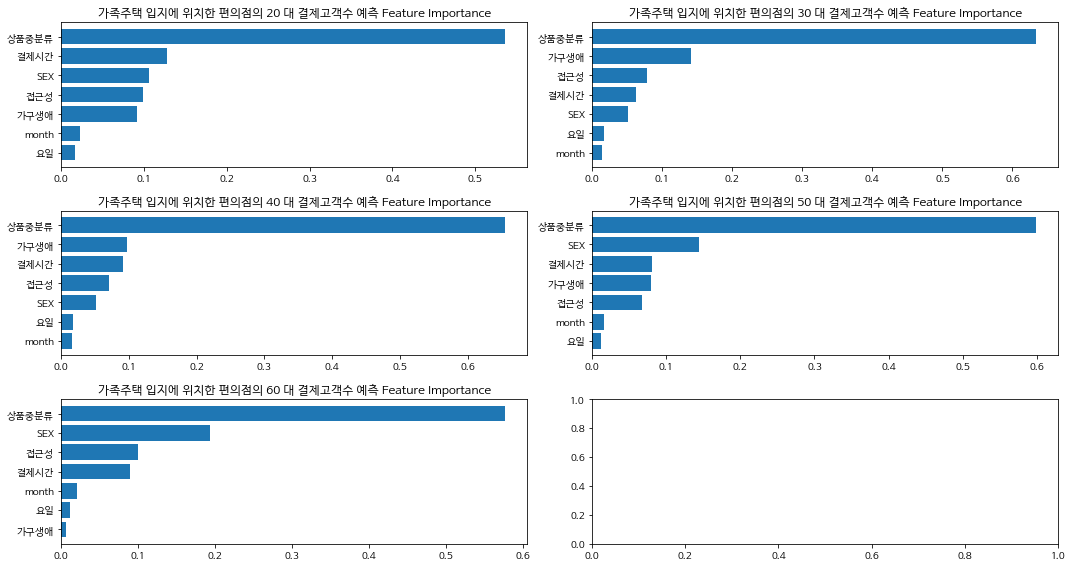

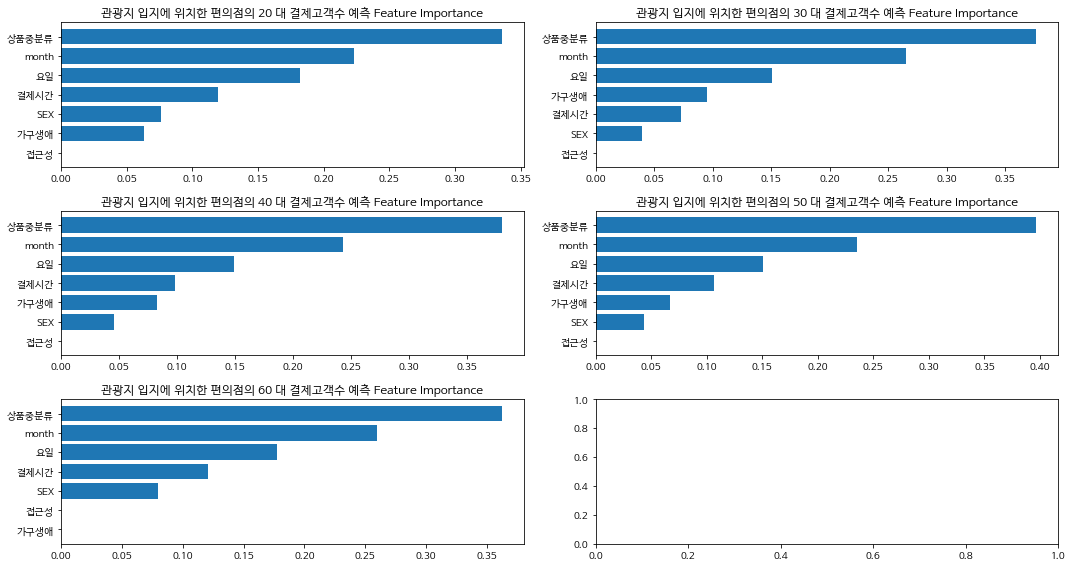

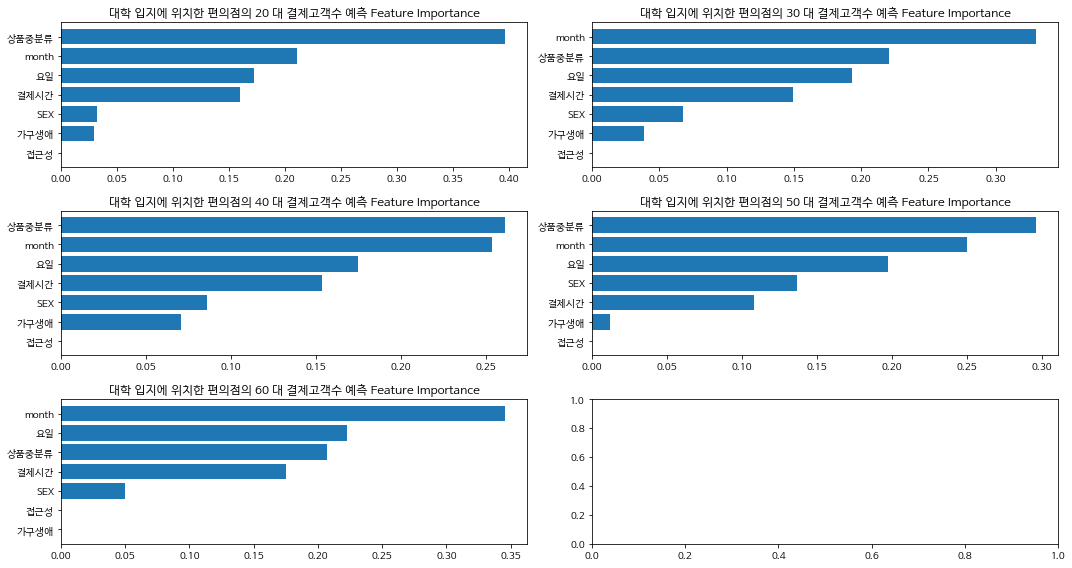

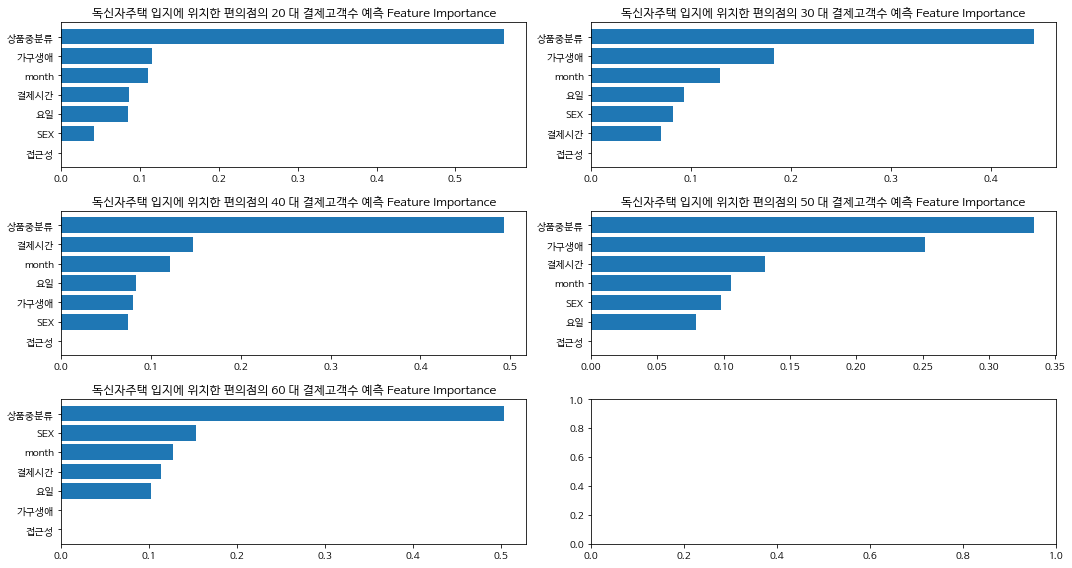

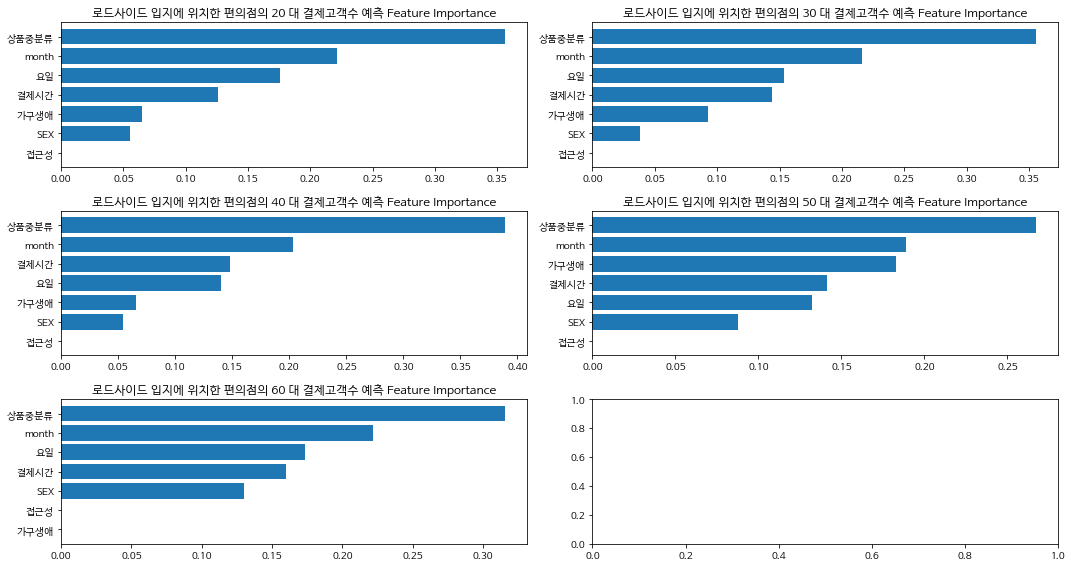

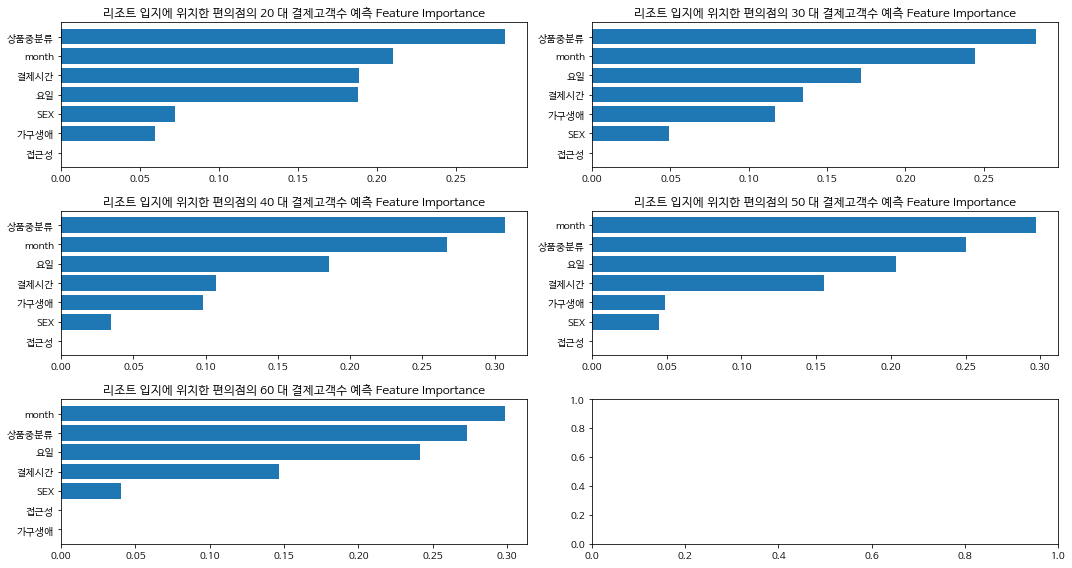

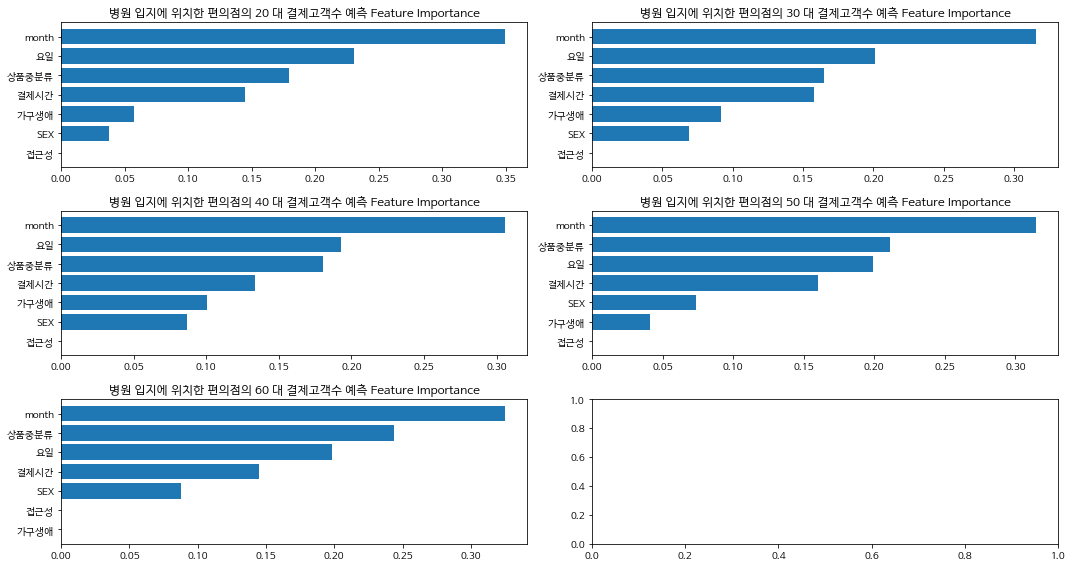

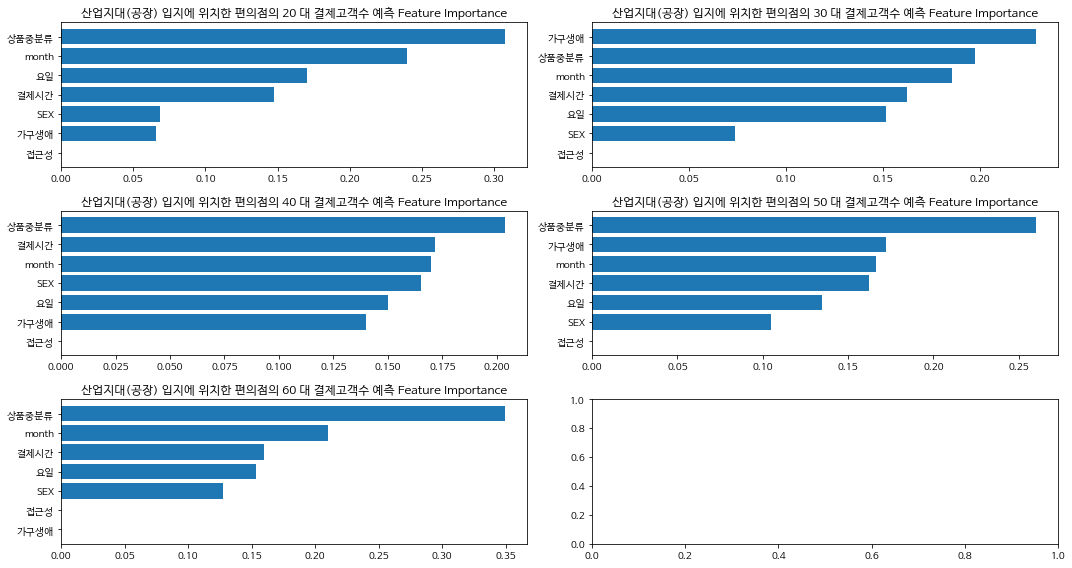

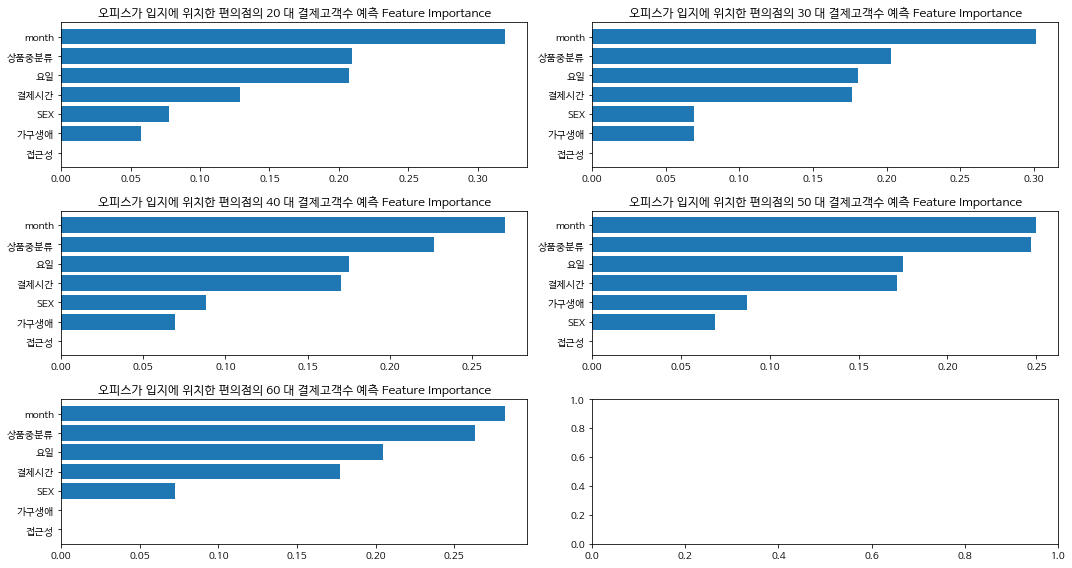

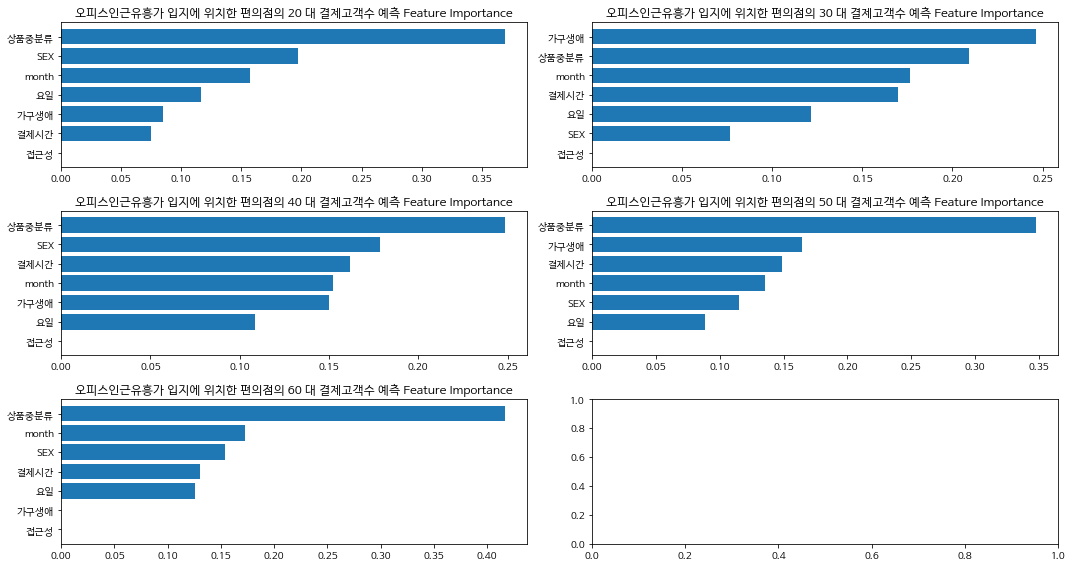

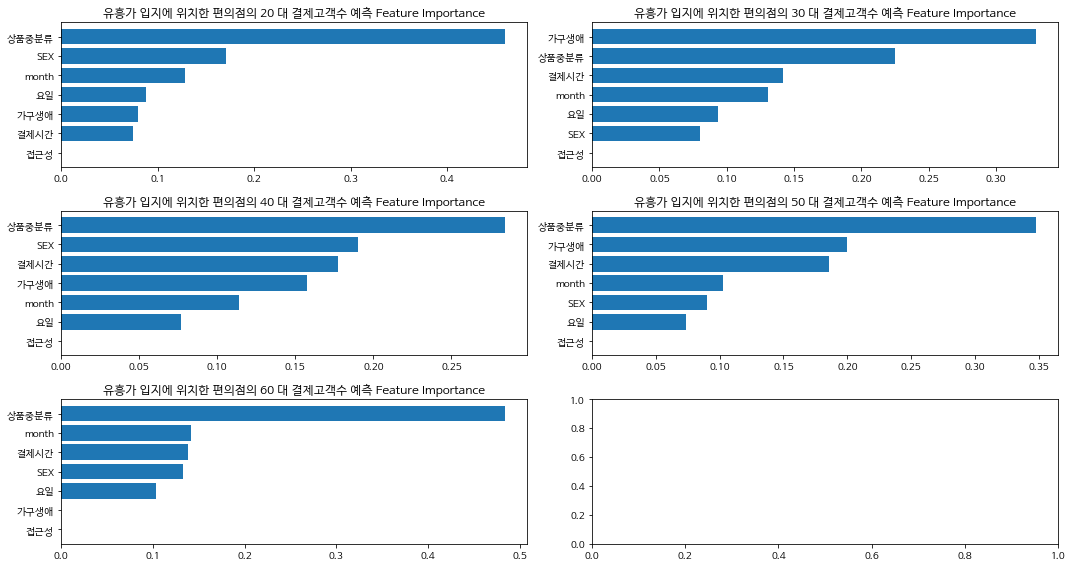

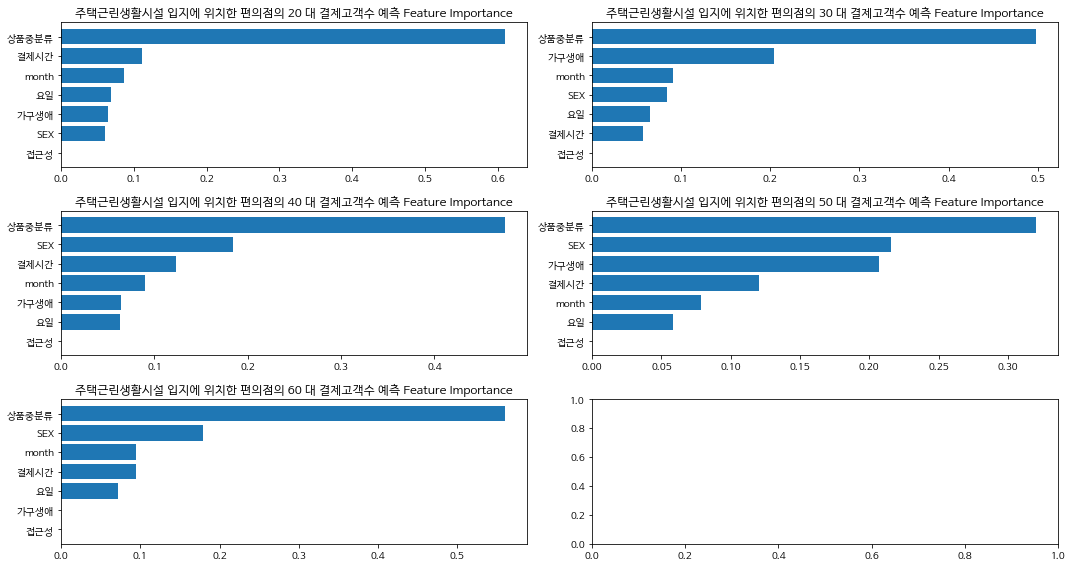

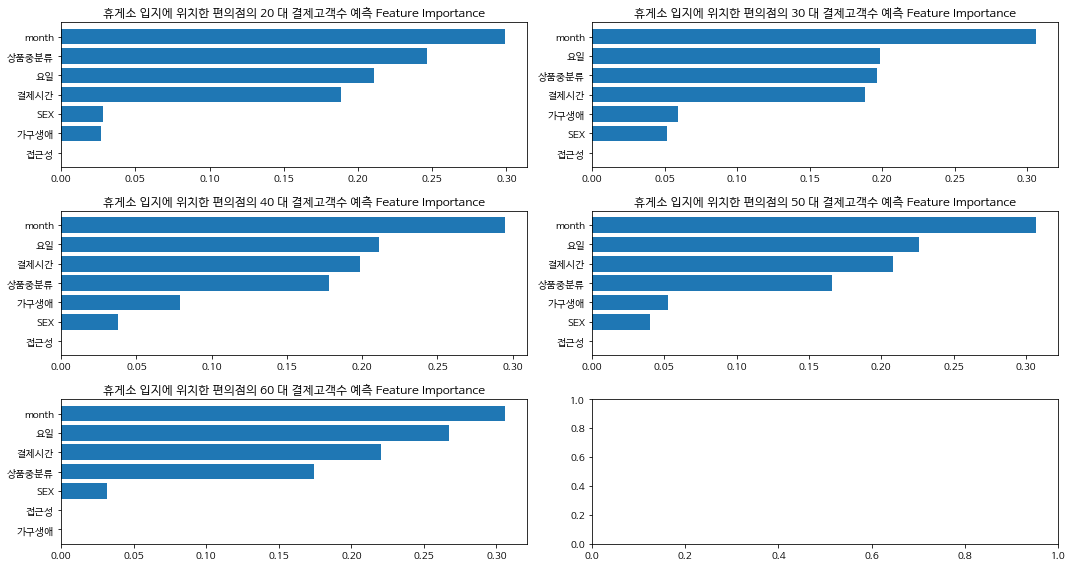

In [ ]:
for k in list(split_df.주변입지.unique()) :
    
        fig,ax = plt.subplots(nrows=3, ncols=2, figsize = (15,8))

        for j , p in  zip( [20,30,40,50,60] ,[1,2,3,4,5,6]) : 

                small = data[(data['주변입지'] == k) & (data['AGE'] == j)].drop(['YM_CD', '시도명', '운영점포수', '주변입지', 'AGE','상품대분류','단가'], axis=1)

                df = small.copy()
                
                df[num_cols] = ss.fit_transform(df[num_cols]) # 수치형 변환 

                for i in cat_cols : 

                    df[i] = le.fit_transform(df[i]) # 범주형 변환 

                X = df.drop(['결제고객수','결제금액','결제수량'],axis=1)
                y = df['결제고객수']

                x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=12)

                rf = RandomForestRegressor()

                rf.fit(x_train, y_train)



                plt.subplot(3,2,p)

                sorted_idx = rf.feature_importances_.argsort()[:15]
                plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
                plt.title(f'{k} 입지에 위치한 편의점의 {j} 대 결제고객수 예측 Feature Importance') 
                plt.tight_layout()


        plt.show()

#### 3-5. 수치형 변수 스케일링 :  MinMaxScaler 

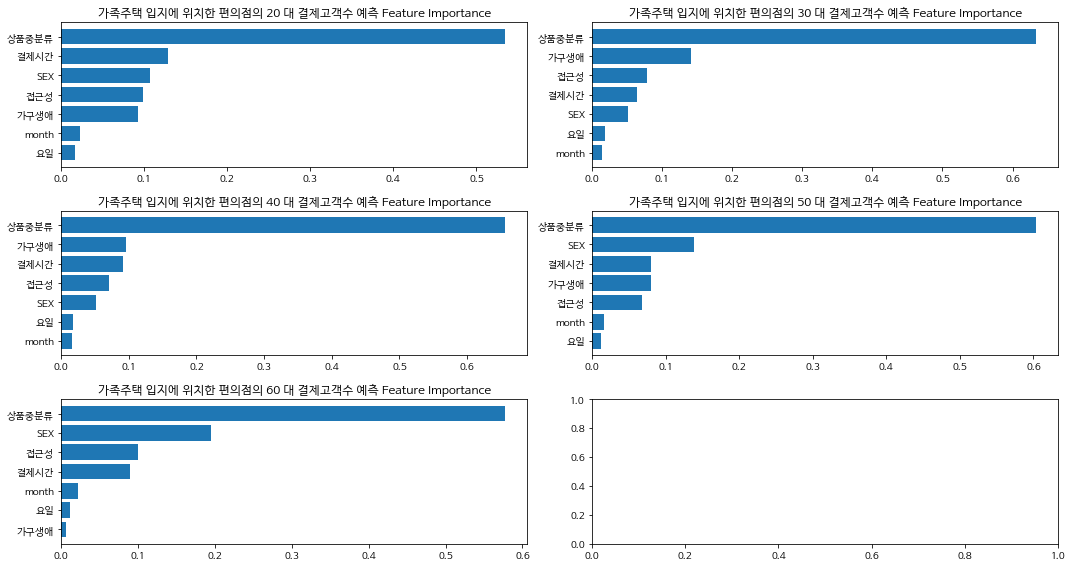

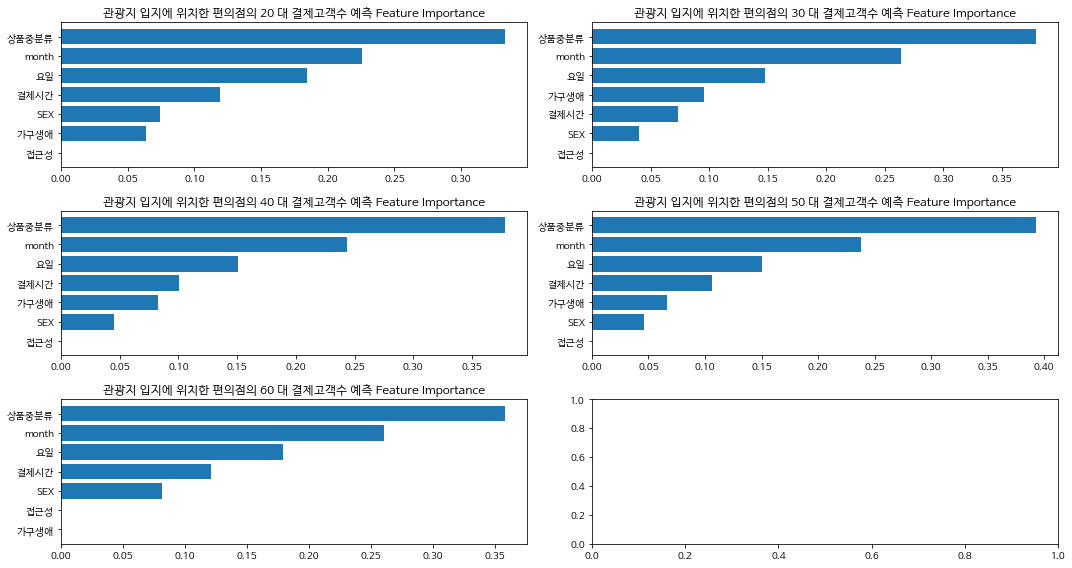

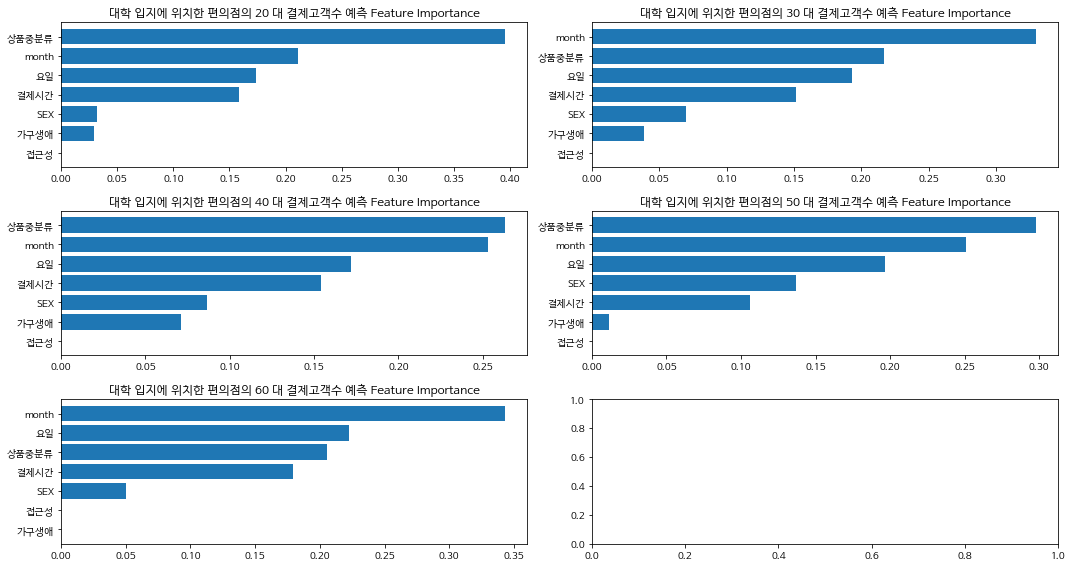

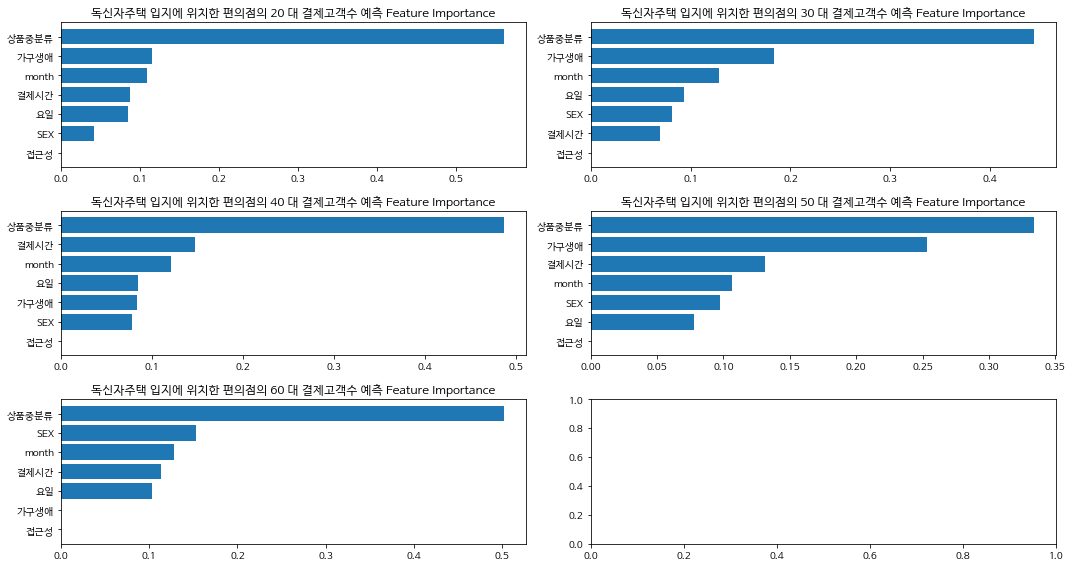

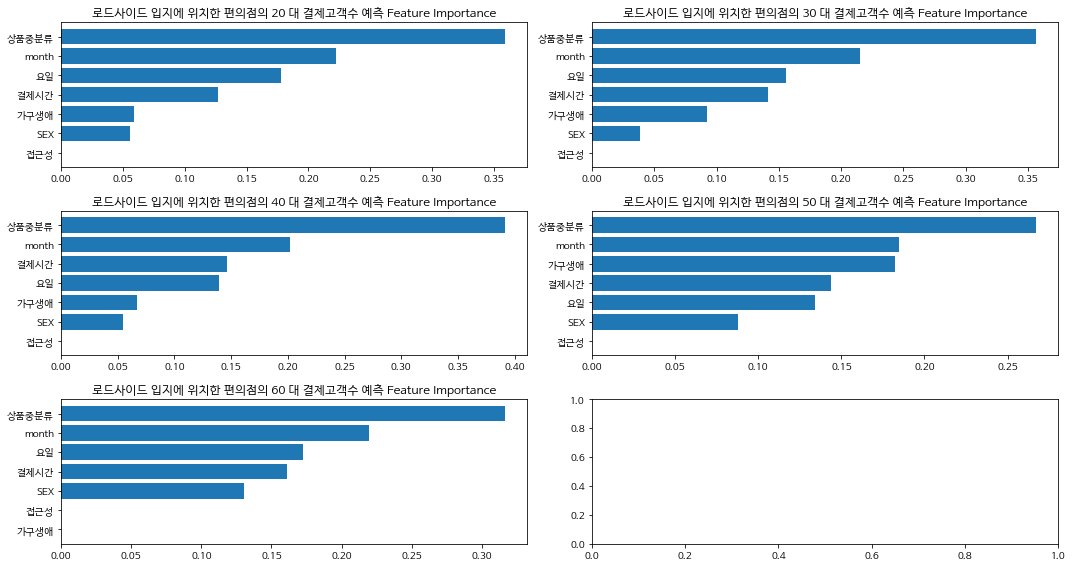

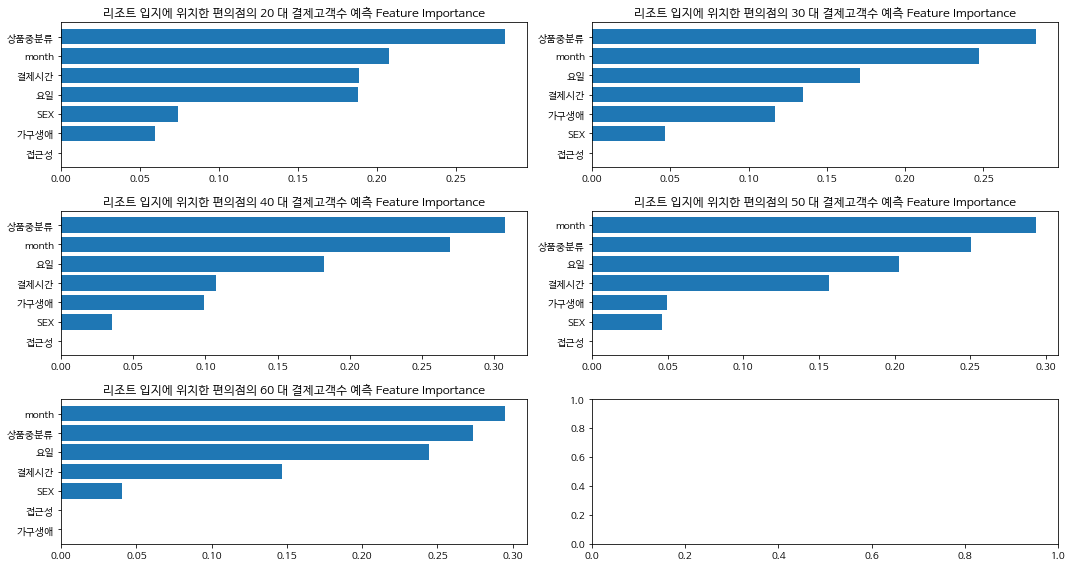

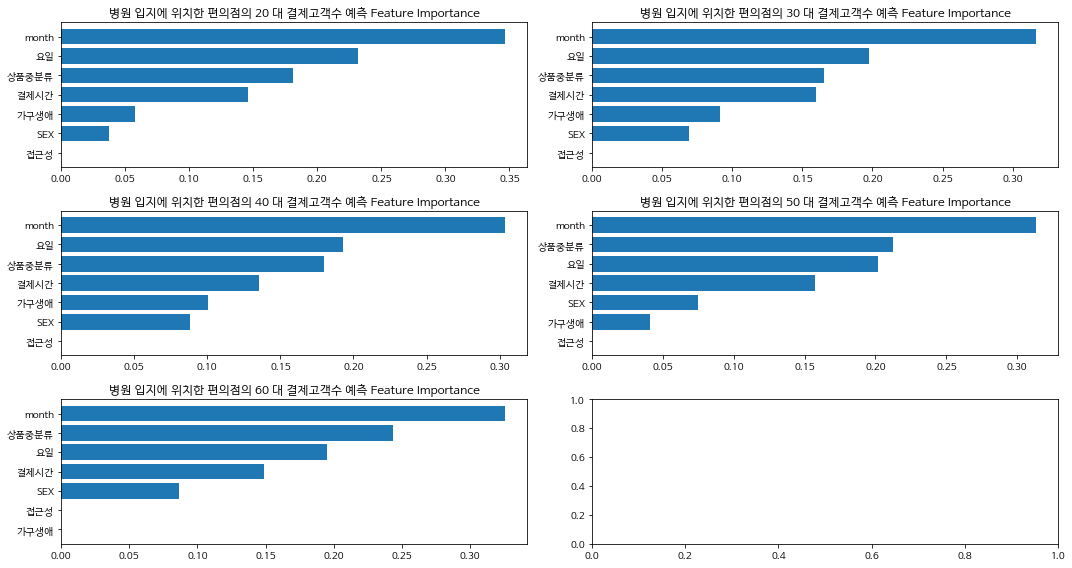

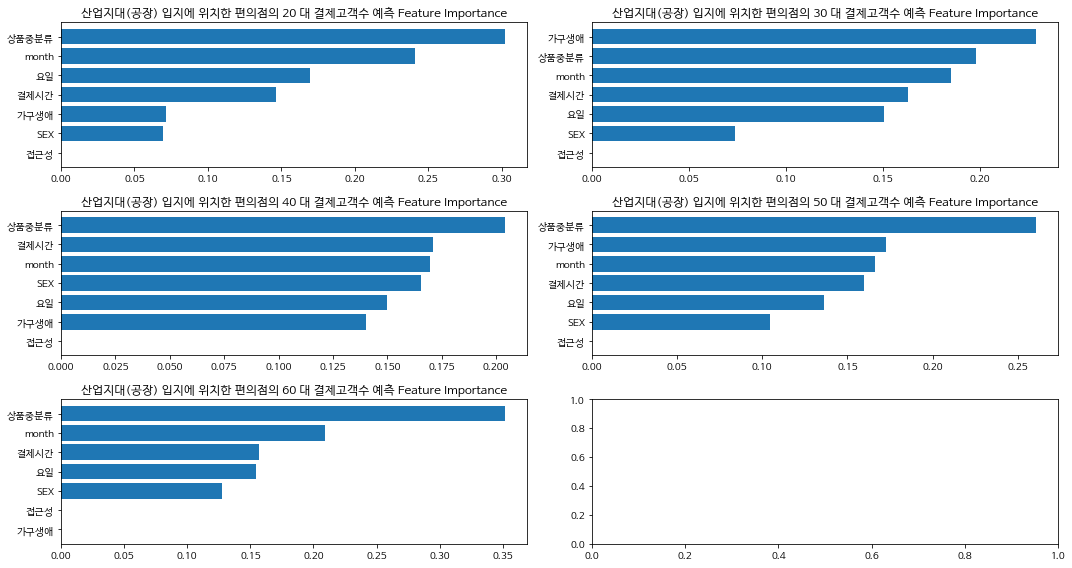

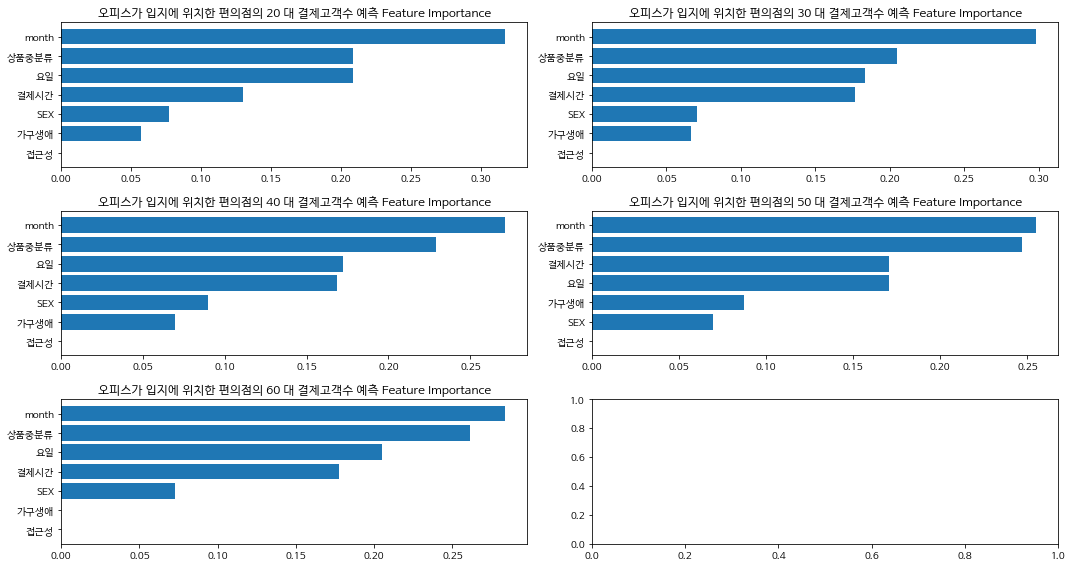

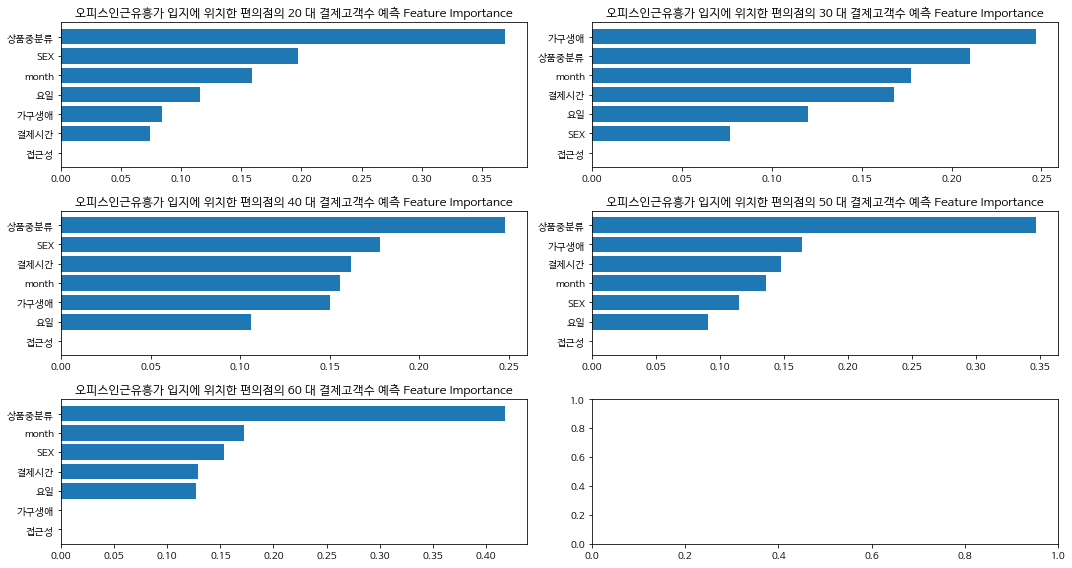

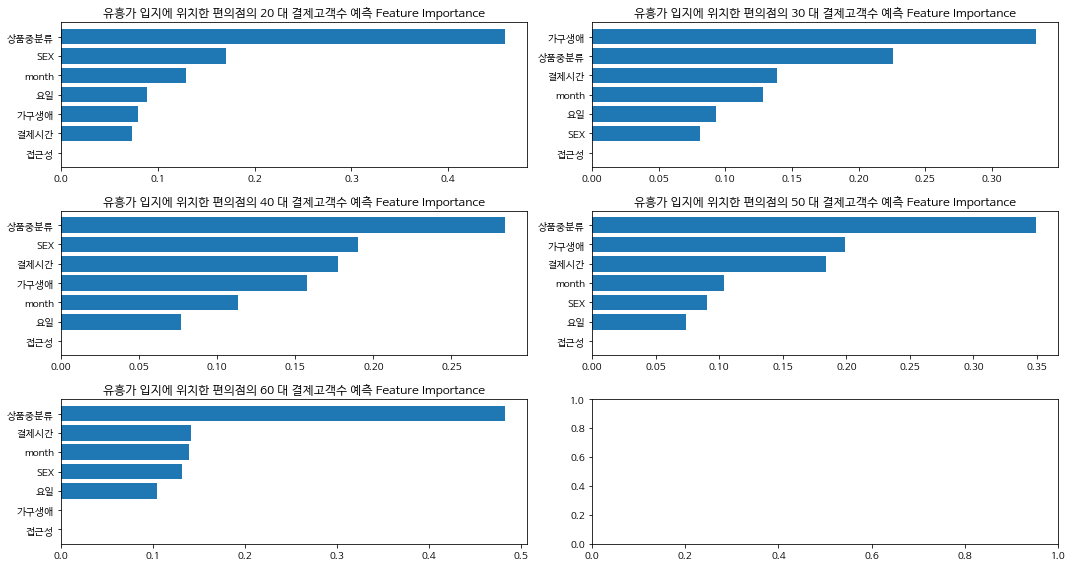

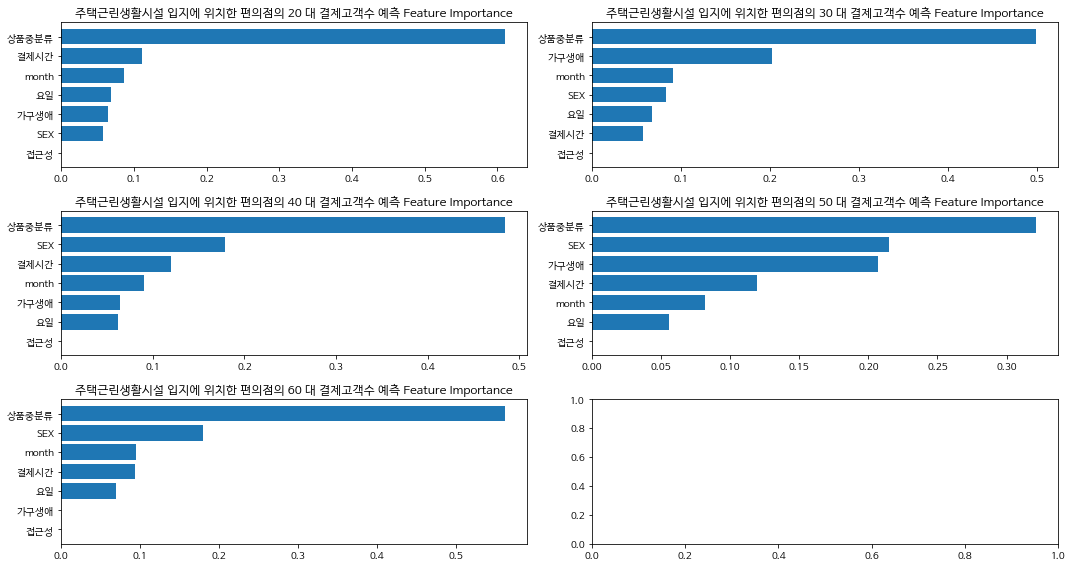

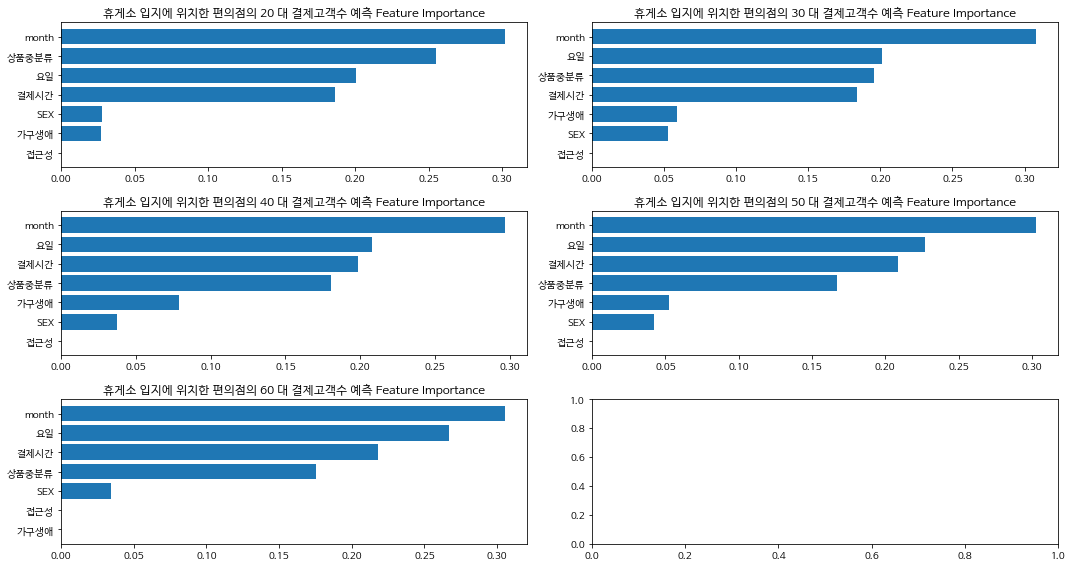

In [ ]:
for k in list(split_df.주변입지.unique()) :
    
        fig,ax = plt.subplots(nrows=3, ncols=2, figsize = (15,8))

        for j , p in  zip( [20,30,40,50,60] ,[1,2,3,4,5,6]) : 

                small = data[(data['주변입지'] == k) & (data['AGE'] == j)].drop(['YM_CD', '시도명', '운영점포수', '주변입지', 'AGE','상품대분류','단가'], axis=1)

                df = small.copy()
                
                df[num_cols] = ms.fit_transform(df[num_cols]) # 수치형 변환 

                for i in cat_cols : 

                    df[i] = le.fit_transform(df[i]) # 범주형 변환 

                X = df.drop(['결제고객수','결제금액','결제수량'],axis=1)
                y = df['결제고객수']

                x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=12)

                rf = RandomForestRegressor()

                rf.fit(x_train, y_train)



                plt.subplot(3,2,p)

                sorted_idx = rf.feature_importances_.argsort()[:15]
                plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
                plt.title(f'{k} 입지에 위치한 편의점의 {j} 대 결제고객수 예측 Feature Importance') 
                plt.tight_layout()


        plt.show()

#### 3-6. 범주형 변수 스케일링 :   원핫인코딩

In [ ]:
#df = pd.get_dummies(df, columns = cat_cols) # 원핫인코딩
num_cols = ['운영점포수', '결제수량', '결제금액', '결제고객수']
cat_cols = ['상품대분류', '상품중분류', 'month', '요일', '결제시간', '가구생애','접근성']

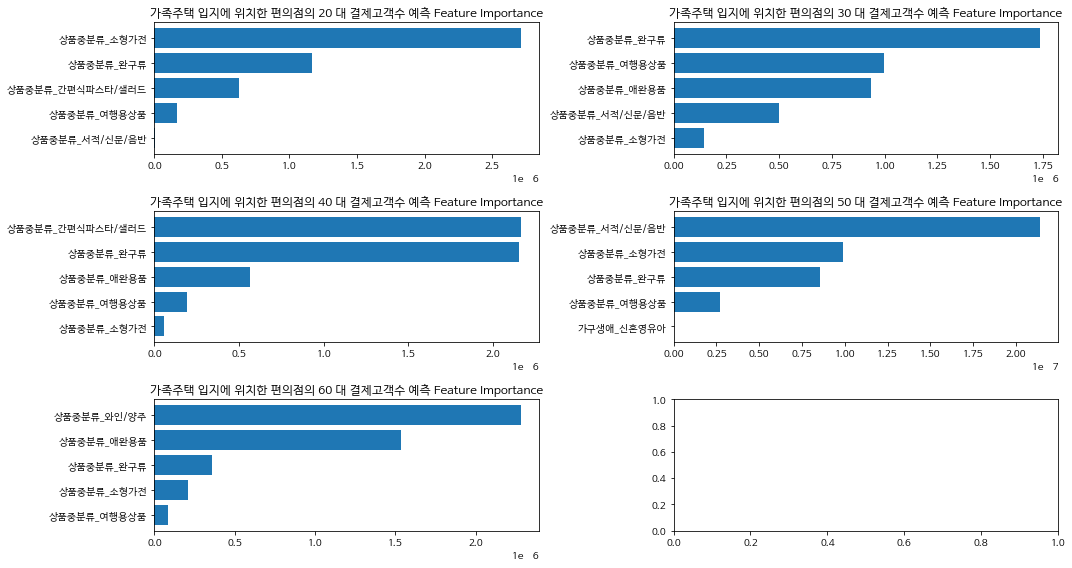

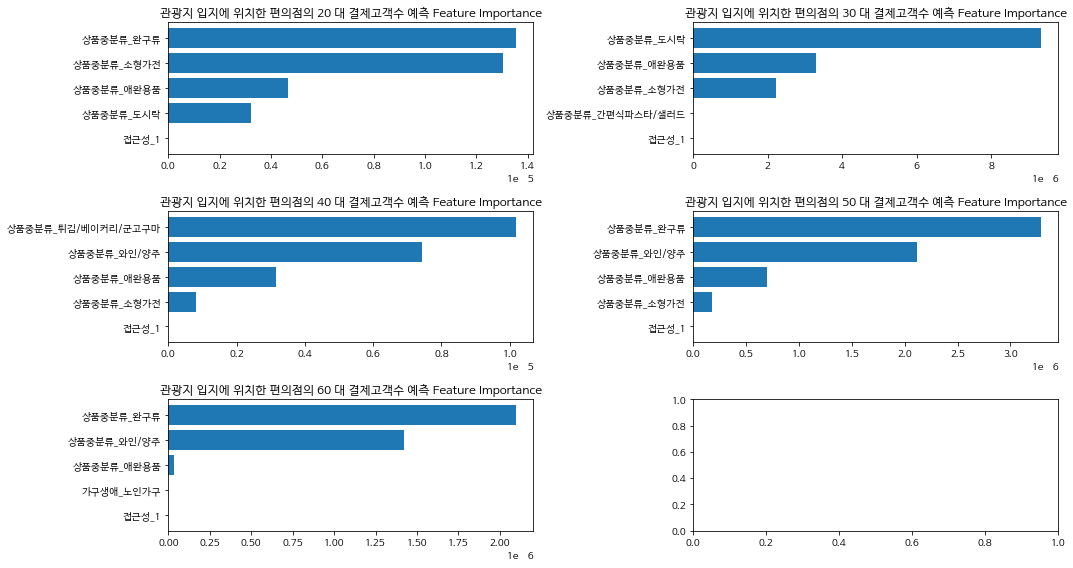

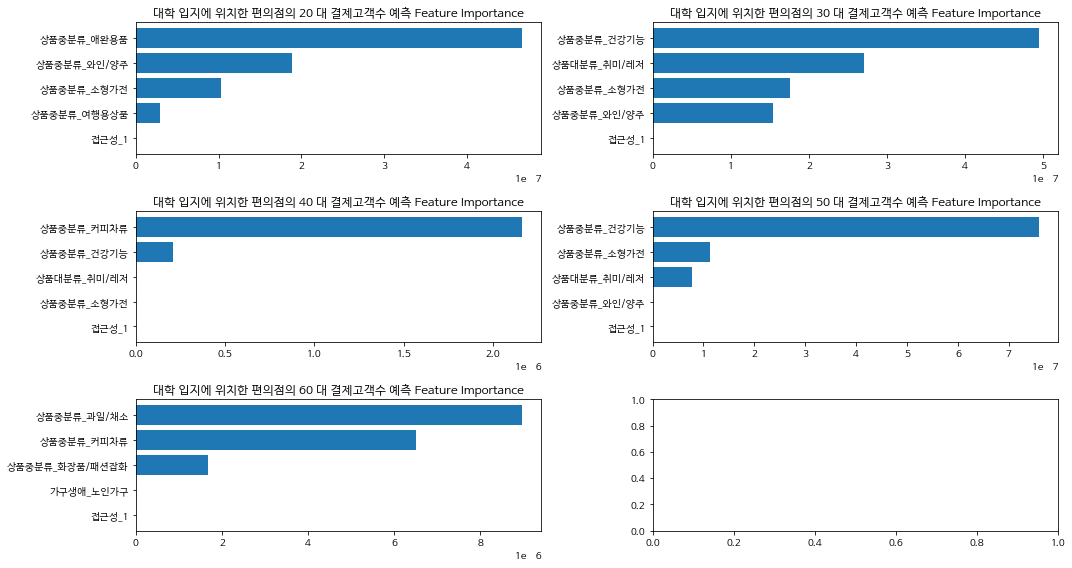

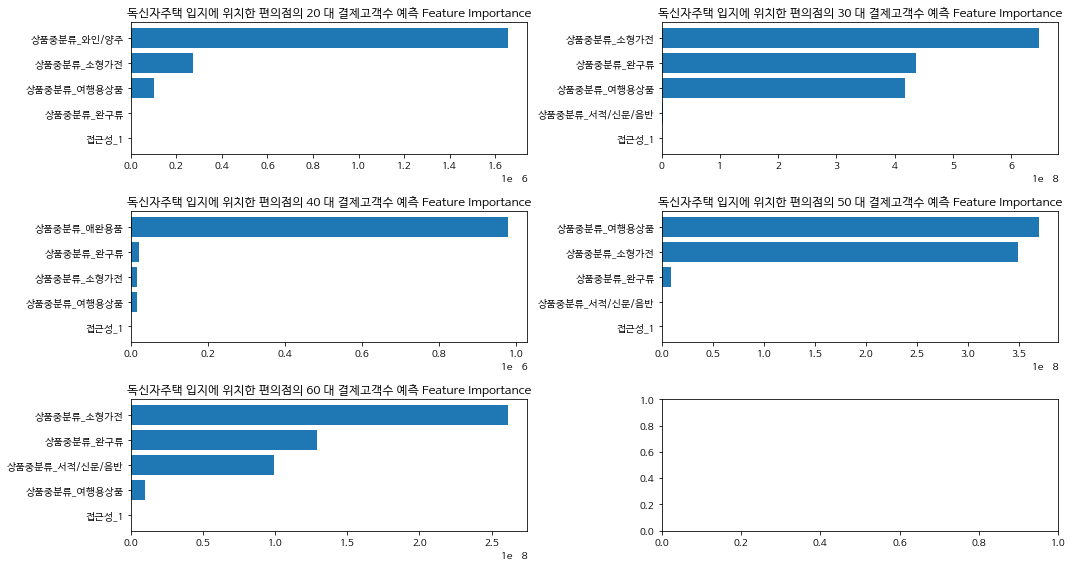

KeyboardInterrupt: 

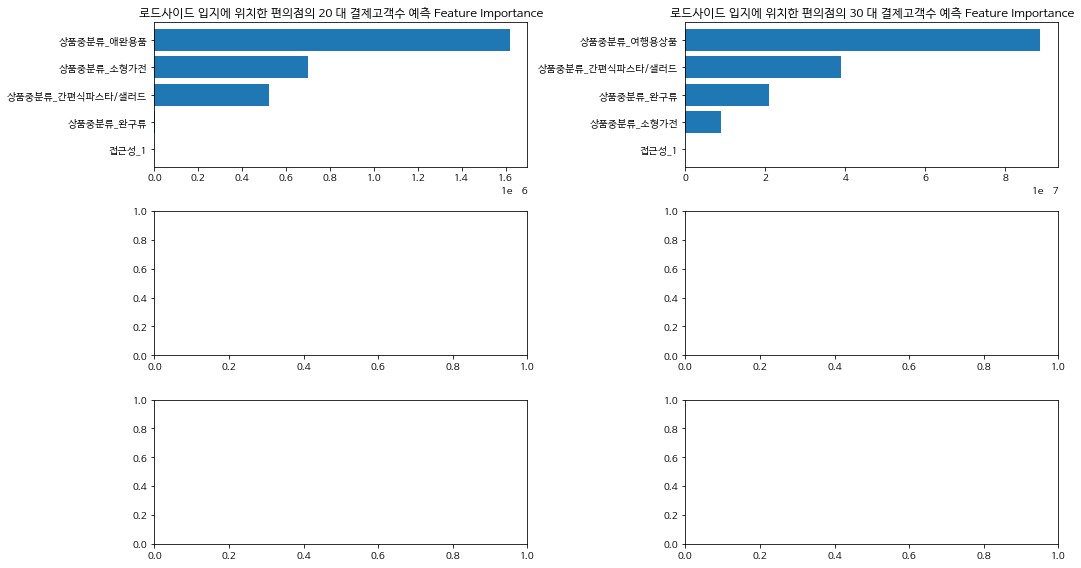

In [ ]:
for k in list(split_df.주변입지.unique()) :
    
        fig,ax = plt.subplots(nrows=3, ncols=2, figsize = (15,8))

        for j , p in  zip( [20,30,40,50,60] ,[1,2,3,4,5,6]) : 

                small = data[(data['주변입지'] == k) & (data['AGE'] == j)].drop(['주변입지','AGE'], axis=1)

                df = small.copy()
                df.drop(['YM_CD','시도명'],axis=1,inplace=True)
                df[num_cols] = ms.fit_transform(df[num_cols])

                df = pd.get_dummies(df, columns = cat_cols)

                X = df.drop(['결제고객수','결제금액','결제수량','운영점포수'],axis=1)
                y = df['결제고객수']

                x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=12)

                rf = RandomForestRegressor()

                rf.fit(x_train, y_train)



                plt.subplot(3,2,p)

                sorted_idx = rf.feature_importances_.argsort()[:5]
                plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
                plt.title(f'{k} 입지에 위치한 편의점의 {j} 대 결제고객수 예측 Feature Importance') 
                plt.tight_layout()


        plt.show()

# 결론 : RobustScaler , LabelEncoding 을 사용하여 모델링 진행